# Facebook Data Crawling
After the data is collected, we need to process the data to make it more readable and easier to analyze. We can do some simple visualization to see the data distribution and the relationship between the data. We can also do some simple data cleaning to remove the data that is not needed. In this notebook, we will do some simple data processing on the data we collected from Facebook.

In [555]:
%pip install matplotlib pandas numpy seaborn wordcloud

Note: you may need to restart the kernel to use updated packages.


In [556]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [557]:
raw_df = pd.read_excel('Data/usuktimes .xlsx')

In [558]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   post_id                        100 non-null    int64         
 1   text                           100 non-null    object        
 2   post_text                      100 non-null    object        
 3   shared_text                    0 non-null      float64       
 4   original_text                  0 non-null      float64       
 5   time                           100 non-null    datetime64[ns]
 6   timestamp                      100 non-null    int64         
 7   image                          90 non-null     object        
 8   image_lowquality               100 non-null    object        
 9   images                         100 non-null    object        
 10  images_description             100 non-null    object        
 11  images_lowquality   

In [559]:
raw_df.head(5)

post_id                                               text  \
0  621831346134146  Một số người Việt: chê cười Anh Mỹ phân biệt c...   
1  621301309520483                Quá trời md rồiii\n\nCre: Pop Gurlz   
2  620203652963582  Nghỉ chơi Twitter và Tiktok trong những ngày s...   
3  615225000128114  #REVIEW NOPE - JORDAN PEELE (2022)\n\nĐÂY CÓ T...   
4  615210750129539  Tỉ lệ thắng của Serena Williams thực sự kinh k...   

                                           post_text  shared_text  \
0  Một số người Việt: chê cười Anh Mỹ phân biệt c...          NaN   
1                Quá trời md rồiii\n\nCre: Pop Gurlz          NaN   
2  Nghỉ chơi Twitter và Tiktok trong những ngày s...          NaN   
3  #REVIEW NOPE - JORDAN PEELE (2022)\n\nĐÂY CÓ T...          NaN   
4  Tỉ lệ thắng của Serena Williams thực sự kinh k...          NaN   

   original_text                time   timestamp  \
0            NaN 2022-09-11 05:33:48  1662874428   
1            NaN 2022-09-10 15:22:55  1662823375   
2            NaN 2022-09-09 11:19:12  1662722352   
3            NaN 2022-09-03 05:19:23  1662182363   
4            NaN 2022-09-03 04:48:58  1662180538   

                                               image  \
0  https://scontent.ftir6-1.fna.fbcdn.net/v/t39.3...   
1  https://scontent.ftir6-1.fna.fbcdn.net/v/t39.3...   
2                                                NaN   
3  https://scontent.ftir6-1.fna.fbcdn.net/v/t39.3...   
4  https://scontent.ftir6-1.fna.fbcdn.net/v/t39.3...   

                                    image_lowquality  \
0  https://scontent.ftir6-1.fna.fbcdn.net/v/t39.3...   
1  https://scontent.ftir6-1.fna.fbcdn.net/v/t39.3...   
2  https://scontent.ftir6-1.fna.fbcdn.net/m1/v/t6...   
3  https://scontent.ftir6-1.fna.fbcdn.net/v/t39.3...   
4  https://scontent.ftir6-1.fna.fbcdn.net/v/t39.3...   

                                              images  ... reaction_count with  \
0  ['https://scontent.ftir6-1.fna.fbcdn.net/v/t39...  ...            857  NaN   
1  ['https://scontent.ftir6-1.fna.fbcdn.net/v/t39...  ...             55  NaN   
2                                                 []  ...           1192  NaN   
3  ['https://scontent.ftir6-1.fna.fbcdn.net/v/t39...  ...            150  NaN   
4  ['https://scontent.ftir6-1.fna.fbcdn.net/v/t39...  ...           5685  NaN   

           page_id sharers      image_id            image_ids  was_live  \
0  194884918029862     NaN  6.218400e+14  ['621840039466610']     False   
1  194884918029862     NaN  6.213011e+14  ['621301116187169']     False   
2  194884918029862     NaN           NaN                   []     False   
3  194884918029862     NaN  6.152233e+14  ['615223286794952']     False   
4  194884918029862     NaN  6.152068e+14  ['615206806796600']     False   

             fetched_time  video_ids videos  
0 2022-09-11 07:02:51.407        NaN    NaN  
1 2022-09-11 07:03:11.154        NaN    NaN  
2 2022-09-11 07:03:13.923        NaN    NaN  
3 2022-09-11 07:03:49.815        NaN    NaN  
4 2022-09-11 07:03:56.425        NaN    NaN  

[5 rows x 53 columns]

In [560]:
raw_df.columns

Index(['post_id', 'text', 'post_text', 'shared_text', 'original_text', 'time',
       'timestamp', 'image', 'image_lowquality', 'images',
       'images_description', 'images_lowquality',
       'images_lowquality_description', 'video', 'video_duration_seconds',
       'video_height', 'video_id', 'video_quality', 'video_size_MB',
       'video_thumbnail', 'video_watches', 'video_width', 'likes', 'comments',
       'shares', 'post_url', 'link', 'links', 'user_id', 'username',
       'user_url', 'is_live', 'factcheck', 'shared_post_id', 'shared_time',
       'shared_user_id', 'shared_username', 'shared_post_url', 'available',
       'comments_full', 'reactors', 'w3_fb_url', 'reactions', 'reaction_count',
       'with', 'page_id', 'sharers', 'image_id', 'image_ids', 'was_live',
       'fetched_time', 'video_ids', 'videos'],
      dtype='object')

In [561]:
raw_df = raw_df.drop(['image_lowquality','images','images_description','images_lowquality','images_lowquality_description',
                 'video_duration_seconds','video_height','video_size_MB','video_quality','video','video_id','is_live','shared_post_id','shared_time','shared_user_id','shared_username','shared_post_url','available'
                 ,'w3_fb_url','with','sharers','image_id','image_ids','was_live','video_watches','user_id','username',
                 'video_thumbnail','video_width','factcheck','available','sharers','shared_text','original_text',],axis='columns')
raw_df.shape

(100, 21)

In [562]:
raw_df.columns

Index(['post_id', 'text', 'post_text', 'time', 'timestamp', 'image', 'likes',
       'comments', 'shares', 'post_url', 'link', 'links', 'user_url',
       'comments_full', 'reactors', 'reactions', 'reaction_count', 'page_id',
       'fetched_time', 'video_ids', 'videos'],
      dtype='object')

In [564]:
#cleaning
columns_to_check = ['thích', 'yêu thích', 'haha', 'wow', 'buồn', 'phẫn nộ', 'thương thương', 'shares', 'comments']


for column in columns_to_check:
    df_full_with_reactions[column].fillna(0, inplace=True)


selected_columns = ['post_text', 'thích', 'yêu thích', 'haha', 'wow', 'buồn', 'phẫn nộ', 'thương thương', 'shares', 'comments', 'reaction_count']
df_result = df_full_with_reactions[selected_columns]


display(df_result)

post_text    thích  yêu thích  \
0   Một số người Việt: chê cười Anh Mỹ phân biệt c...    641.0      151.0   
1                 Quá trời md rồiii\n\nCre: Pop Gurlz     25.0        0.0   
2   Nghỉ chơi Twitter và Tiktok trong những ngày s...    634.0        4.0   
3   #REVIEW NOPE - JORDAN PEELE (2022)\n\nĐÂY CÓ T...    123.0       27.0   
4   Tỉ lệ thắng của Serena Williams thực sự kinh k...   4535.0     1063.0   
..                                                ...      ...        ...   
95  Bài hát đó chính Show Me Love của Robin S phát...    661.0       13.0   
96  Bà hoàng đánh úp BEYONCÉ, thông báo một đằng, ...    130.0        9.0   
97  Ca khúc sẽ là lead singer trong album sắp tới ...     77.0       23.0   
98  Cả hai được xét theo tiêu chuẩn tỷ lệ vàng dựa...  27650.0      868.0   
99  Trước làn sóng chỉ trích của một bộ phận khán ...   3796.0     1353.0   

      haha    wow   buồn  phẫn nộ  thương thương  shares  comments  \
0     46.0    0.0   13.0      0.0            6.0      51       134   
1     29.0    0.0    1.0      0.0            0.0       0         0   
2    362.0    1.0  190.0      0.0            1.0     104        74   
3      0.0    0.0    0.0      0.0            0.0      17         3   
4      1.0   16.0   33.0      1.0           36.0      77       135   
..     ...    ...    ...      ...            ...     ...       ...   
95   138.0    3.0   11.0      1.0            2.0      14        23   
96     2.0    0.0   20.0      0.0            1.0       1         3   
97     0.0    0.0    0.0      0.0            0.0       1         0   
98  4699.0  115.0  210.0      1.0          101.0     171       914   
99   875.0    6.0   14.0     10.0           60.0     179       864   

    reaction_count  
0              857  
1               55  
2             1192  
3              150  
4             5685  
..             ...  
95             829  
96             162  
97             100  
98           33644  
99            6114  

[100 rows x 11 columns]

## Reactions analysis


In [565]:
raw_df[['post_id','reactions']]

post_id                                          reactions
0    621831346134146  {'thích': 641, 'yêu thích': 151, 'haha': 46, '...
1    621301309520483               {'thích': 25, 'haha': 29, 'buồn': 1}
2    620203652963582  {'thích': 634, 'yêu thích': 4, 'haha': 362, 'w...
3    615225000128114                    {'thích': 123, 'yêu thích': 27}
4    615210750129539  {'thích': 4535, 'yêu thích': 1063, 'haha': 1, ...
..               ...                                                ...
95  1178552979663046  {'thích': 661, 'yêu thích': 13, 'haha': 138, '...
96  1177737839744560  {'thích': 130, 'yêu thích': 9, 'haha': 2, 'thư...
97  1177414076443603                     {'thích': 77, 'yêu thích': 23}
98  1177254746459536  {'thích': 27650, 'yêu thích': 868, 'haha': 469...
99  1174643956720615  {'thích': 3796, 'yêu thích': 1353, 'haha': 875...

[100 rows x 2 columns]

In [566]:
df_full=raw_df[['time','timestamp' ,'reaction_count']]
df_full


time   timestamp  reaction_count
0  2022-09-11 05:33:48  1662874428             857
1  2022-09-10 15:22:55  1662823375              55
2  2022-09-09 11:19:12  1662722352            1192
3  2022-09-03 05:19:23  1662182363             150
4  2022-09-03 04:48:58  1662180538            5685
..                 ...         ...             ...
95 2022-06-22 10:23:39  1655893419             829
96 2022-06-21 02:35:11  1655778911             162
97 2022-06-20 14:30:49  1655735449             100
98 2022-06-20 08:57:36  1655715456           33644
99 2022-06-16 14:45:22  1655390722            6114

[100 rows x 3 columns]

In [567]:
df_full_with_reactions[['post_text','time','comments','shares','reaction_count']].loc[df_full_with_reactions['reaction_count'] == df_full_with_reactions['reaction_count'].max()]


post_text                time  comments  shares  \
32  Tôi mỗi khi tìm nhạc kiểu: 2022-08-21 16:23:19      1568     492   

    reaction_count  
32           34670

In [568]:
df_full_with_reactions[['post_text','time','comments','shares','reaction_count']].loc[df_full_with_reactions['reaction_count'] == df_full_with_reactions['reaction_count'].min()]


post_text                time  \
76  Jessie Ware sẽ phát hành single mở đường "Free... 2022-07-13 03:35:00   

    comments  shares  reaction_count  
76         0       0              14

In [569]:
date = [str(timestamp).split(" ")[0] for timestamp in df_full['time']]
date.reverse()
time = [str(timestamp).split(" ")[1] for timestamp in df_full['time']]
time.reverse()
date_time = {
    'date': list(date),
    'time': list(time)
}
df = pd.DataFrame(date_time)
df.sort_values(by = 'time', axis = 0, ascending = True).head(20)


date      time
88  2022-08-29  01:17:32
17  2022-07-02  01:30:07
89  2022-08-29  01:41:02
41  2022-08-06  02:26:50
3   2022-06-21  02:35:11
76  2022-08-24  02:38:06
69  2022-08-22  02:38:36
12  2022-06-29  02:45:27
70  2022-08-22  03:00:25
25  2022-07-15  03:02:01
59  2022-08-21  03:30:01
49  2022-08-19  03:33:04
23  2022-07-13  03:35:00
80  2022-08-25  03:49:16
60  2022-08-21  03:58:23
77  2022-08-24  04:00:08
90  2022-08-29  04:00:26
42  2022-08-07  04:07:39
81  2022-08-25  04:11:41
50  2022-08-19  04:18:35

In [570]:

df.sort_values(by = 'time', axis = 0, ascending = False).head(20)


date      time
6   2022-06-23  23:24:53
71  2022-08-22  18:31:35
37  2022-08-04  18:10:26
58  2022-08-20  17:05:33
68  2022-08-21  16:38:53
67  2022-08-21  16:23:19
16  2022-06-30  16:15:16
75  2022-08-23  16:08:57
66  2022-08-21  16:07:35
10  2022-06-25  15:50:07
18  2022-07-02  15:43:00
21  2022-07-04  15:40:01
98  2022-09-10  15:22:55
0   2022-06-16  14:45:22
2   2022-06-20  14:30:49
93  2022-08-30  14:25:47
86  2022-08-26  14:21:11
74  2022-08-23  14:02:59
22  2022-07-08  13:30:30
73  2022-08-23  13:18:56

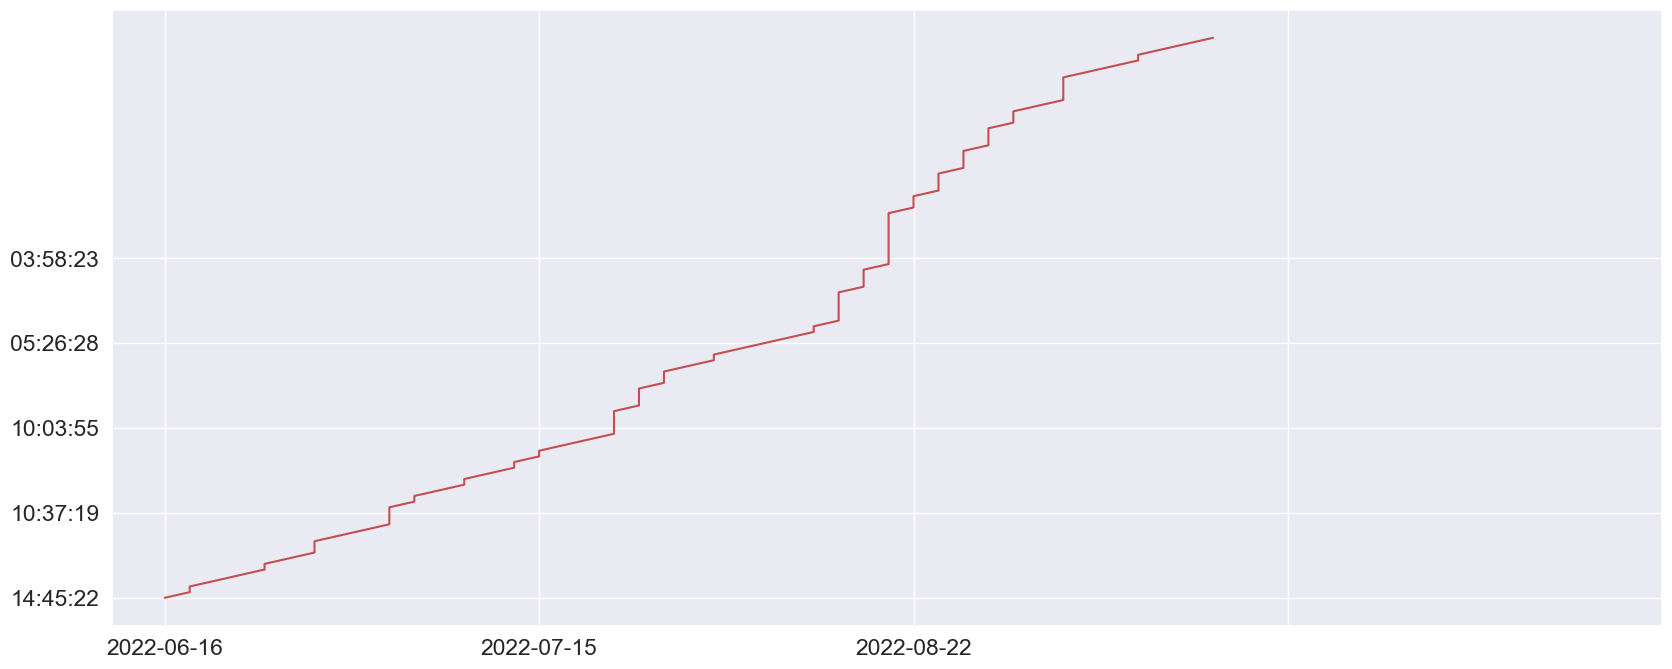

In [572]:
fig, ax = plt.subplots(figsize=(20, 8))
x1 = list(date)
y1 = list(time)
plt.plot(x1,y1,c = 'r')
ax.set_xticks(np.arange(0,15*5,15))
ax.set_yticks(np.arange(0,15*5,15))
plt.show()

In [573]:
raw_df.describe()

post_id                        time     timestamp  likes  \
count  1.000000e+02                         100  1.000000e+02    0.0   
mean   7.721863e+14  2022-08-05 13:39:56.820000  1.659707e+09    NaN   
min    5.897184e+14         2022-06-16 14:45:22  1.655391e+09    NaN   
25%    6.032316e+14  2022-07-14 15:24:07.500000  1.657812e+09    NaN   
50%    6.071584e+14  2022-08-19 03:55:49.500000  1.660881e+09    NaN   
75%    1.177942e+15  2022-08-23 14:34:28.500000  1.661265e+09    NaN   
max    1.198012e+15         2022-09-11 05:33:48  1.662874e+09    NaN   
std    2.649226e+14                         NaN  2.125430e+06    NaN   

          comments      shares  reaction_count       page_id  \
count   100.000000  100.000000      100.000000  1.000000e+02   
mean    110.270000   41.500000     1950.320000  1.948849e+14   
min       0.000000    0.000000       14.000000  1.948849e+14   
25%       7.000000    1.000000      183.250000  1.948849e+14   
50%      20.000000    8.000000      555.500000  1.948849e+14   
75%      74.500000   24.500000     1341.500000  1.948849e+14   
max    1568.000000  571.000000    34670.000000  1.948849e+14   
std     275.906252   98.533745     5215.766312  9.422230e-02   

                        fetched_time  
count                            100  
mean   2022-09-11 07:14:01.473580032  
min       2022-09-11 07:02:51.407000  
25%    2022-09-11 07:08:32.149500160  
50%    2022-09-11 07:14:30.463499776  
75%    2022-09-11 07:19:19.817750016  
max       2022-09-11 07:24:30.879000  
std                              NaN

In [574]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   post_id         100 non-null    int64         
 1   text            100 non-null    object        
 2   post_text       100 non-null    object        
 3   time            100 non-null    datetime64[ns]
 4   timestamp       100 non-null    int64         
 5   image           90 non-null     object        
 6   likes           0 non-null      float64       
 7   comments        100 non-null    int64         
 8   shares          100 non-null    int64         
 9   post_url        100 non-null    object        
 10  link            2 non-null      object        
 11  links           100 non-null    object        
 12  user_url        100 non-null    object        
 13  comments_full   100 non-null    object        
 14  reactors        100 non-null    object        
 15  reactio

In [575]:
df_full.head(100)

time   timestamp  reaction_count
0  2022-09-11 05:33:48  1662874428             857
1  2022-09-10 15:22:55  1662823375              55
2  2022-09-09 11:19:12  1662722352            1192
3  2022-09-03 05:19:23  1662182363             150
4  2022-09-03 04:48:58  1662180538            5685
..                 ...         ...             ...
95 2022-06-22 10:23:39  1655893419             829
96 2022-06-21 02:35:11  1655778911             162
97 2022-06-20 14:30:49  1655735449             100
98 2022-06-20 08:57:36  1655715456           33644
99 2022-06-16 14:45:22  1655390722            6114

[100 rows x 3 columns]

In [576]:
raw_df['reactions']

0     {'thích': 641, 'yêu thích': 151, 'haha': 46, '...
1                  {'thích': 25, 'haha': 29, 'buồn': 1}
2     {'thích': 634, 'yêu thích': 4, 'haha': 362, 'w...
3                       {'thích': 123, 'yêu thích': 27}
4     {'thích': 4535, 'yêu thích': 1063, 'haha': 1, ...
                            ...                        
95    {'thích': 661, 'yêu thích': 13, 'haha': 138, '...
96    {'thích': 130, 'yêu thích': 9, 'haha': 2, 'thư...
97                       {'thích': 77, 'yêu thích': 23}
98    {'thích': 27650, 'yêu thích': 868, 'haha': 469...
99    {'thích': 3796, 'yêu thích': 1353, 'haha': 875...
Name: reactions, Length: 100, dtype: object

In [577]:
dates=df_full['timestamp'].to_list()
y=df_full['reaction_count'].to_list()
dates.reverse()
y.reverse()
print(len(dates),len(y))
print(dates)
print(y)

100 100
[1655390722, 1655715456, 1655735449, 1655778911, 1655893419, 1655979467, 1656026693, 1656076048, 1656138677, 1656157547, 1656172207, 1656402529, 1656470727, 1656571035, 1656575852, 1656585439, 1656605716, 1656725407, 1656776580, 1656842336, 1656910567, 1656949201, 1657287030, 1657683300, 1657686627, 1657854121, 1657880673, 1657970576, 1658406395, 1659346750, 1659348235, 1659349206, 1659351607, 1659355202, 1659595600, 1659596665, 1659614409, 1659636626, 1659682664, 1659683664, 1659684365, 1659752810, 1659845259, 1659846805, 1660195614, 1660281988, 1660637859, 1660797362, 1660801092, 1660879984, 1660882715, 1660883985, 1660886479, 1660888120, 1660909646, 1660971500, 1660974626, 1660997330, 1661015133, 1661052601, 1661054303, 1661059298, 1661064720, 1661075175, 1661082608, 1661085793, 1661098055, 1661098999, 1661099933, 1661135916, 1661137225, 1661193095, 1661257573, 1661260736, 1661263379, 1661270937, 1661308686, 1661313608, 1661342407, 1661346997, 1661399356, 1661400701, 1661402

In [578]:
first_row = raw_df.iloc[0]
reactions = dict(eval(first_row['reactions']))
reactions["shares"] = first_row['shares']
reactions["comments"] = first_row['comments']

In [579]:
reactions

{'thích': 641,
 'yêu thích': 151,
 'haha': 46,
 'thương thương': 6,
 'buồn': 13,
 'shares': 51,
 'comments': 134}

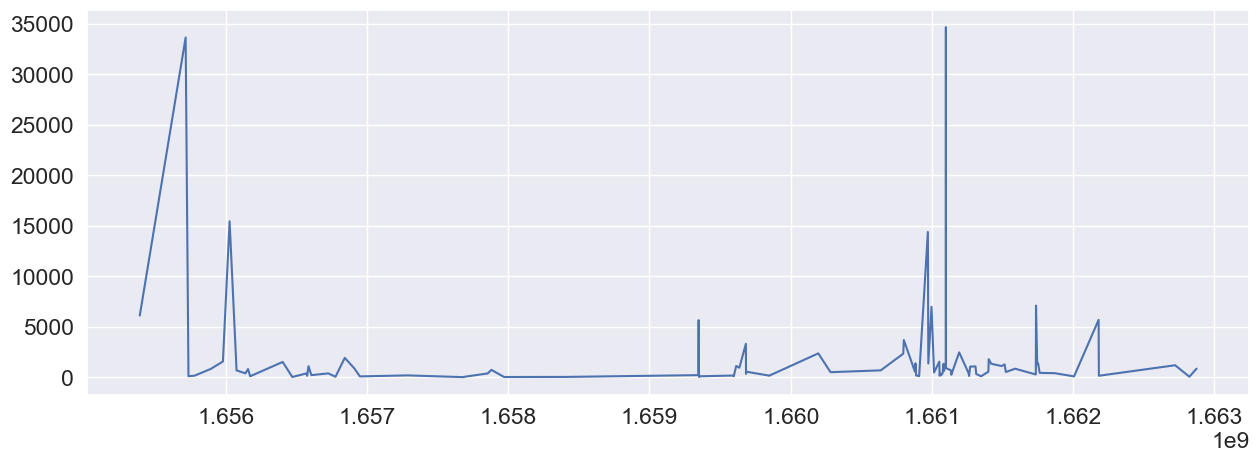

In [580]:
#-	Biểu đồ thể hiện tổng số tương tác theo từng bài đăng
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
plt.plot(dates,y)
plt.show()



In [581]:
raw_df['reactions'] = raw_df['reactions'].apply(lambda x : dict(eval(x)) )
df_full_reactions = raw_df['reactions'].apply(pd.Series )


C:\Users\lapto\AppData\Local\Temp\ipykernel_12184\3437205053.py:2: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  df_full_reactions = raw_df['reactions'].apply(pd.Series )


In [598]:
display(df_result)

post_text    thích  yêu thích  \
0   Một số người Việt: chê cười Anh Mỹ phân biệt c...    641.0      151.0   
1                 Quá trời md rồiii\n\nCre: Pop Gurlz     25.0        0.0   
2   Nghỉ chơi Twitter và Tiktok trong những ngày s...    634.0        4.0   
3   #REVIEW NOPE - JORDAN PEELE (2022)\n\nĐÂY CÓ T...    123.0       27.0   
4   Tỉ lệ thắng của Serena Williams thực sự kinh k...   4535.0     1063.0   
..                                                ...      ...        ...   
95  Bài hát đó chính Show Me Love của Robin S phát...    661.0       13.0   
96  Bà hoàng đánh úp BEYONCÉ, thông báo một đằng, ...    130.0        9.0   
97  Ca khúc sẽ là lead singer trong album sắp tới ...     77.0       23.0   
98  Cả hai được xét theo tiêu chuẩn tỷ lệ vàng dựa...  27650.0      868.0   
99  Trước làn sóng chỉ trích của một bộ phận khán ...   3796.0     1353.0   

      haha    wow   buồn  phẫn nộ  thương thương  shares  comments  \
0     46.0    0.0   13.0      0.0            6.0      51       134   
1     29.0    0.0    1.0      0.0            0.0       0         0   
2    362.0    1.0  190.0      0.0            1.0     104        74   
3      0.0    0.0    0.0      0.0            0.0      17         3   
4      1.0   16.0   33.0      1.0           36.0      77       135   
..     ...    ...    ...      ...            ...     ...       ...   
95   138.0    3.0   11.0      1.0            2.0      14        23   
96     2.0    0.0   20.0      0.0            1.0       1         3   
97     0.0    0.0    0.0      0.0            0.0       1         0   
98  4699.0  115.0  210.0      1.0          101.0     171       914   
99   875.0    6.0   14.0     10.0           60.0     179       864   

    reaction_count  
0              857  
1               55  
2             1192  
3              150  
4             5685  
..             ...  
95             829  
96             162  
97             100  
98           33644  
99            6114  

[100 rows x 11 columns]

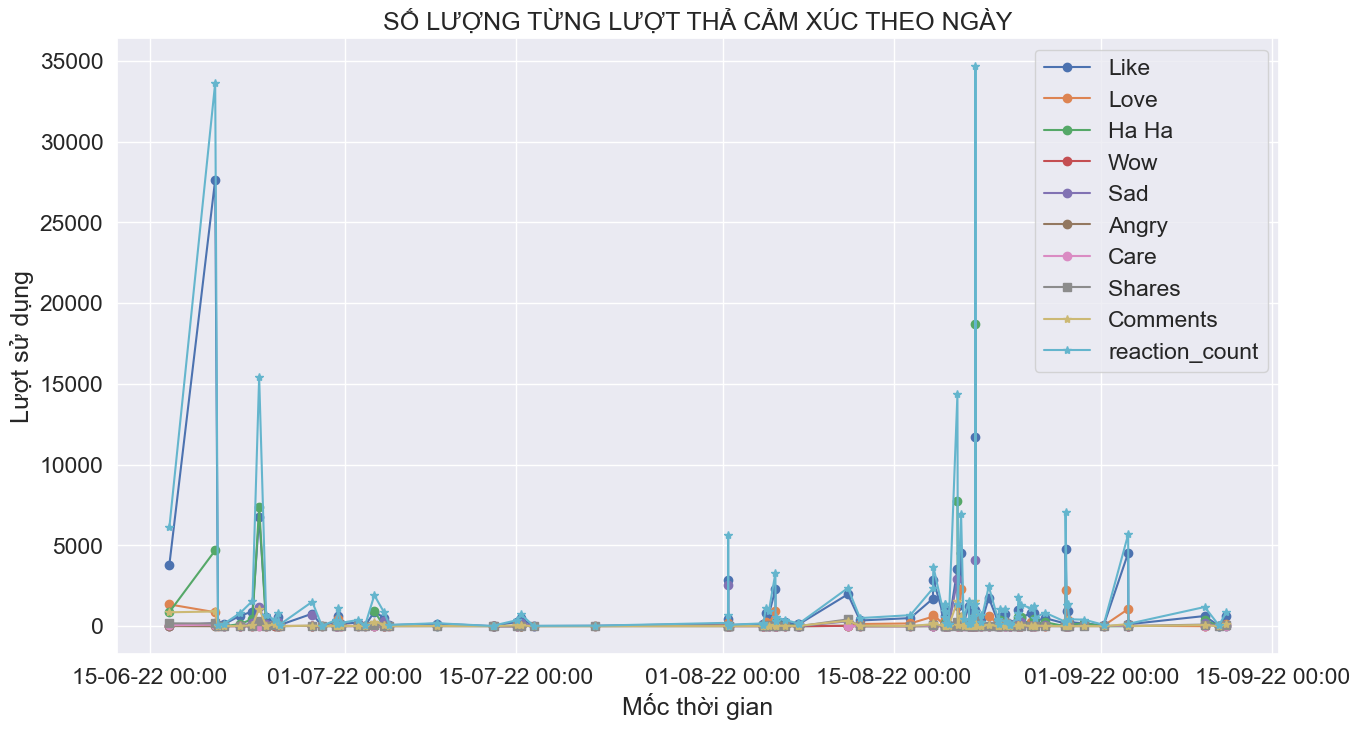

In [608]:
#phân tích từng loại lượt react theo ngày
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(df_full_with_reactions['time'], df_full_with_reactions['thích'], label = "Like", marker="o")
ax.plot(df_full_with_reactions['time'], df_full_with_reactions['yêu thích'], label = "Love", marker="o")
ax.plot(df_full_with_reactions['time'], df_full_with_reactions['haha'], label = "Ha Ha", marker="o")
ax.plot(df_full_with_reactions['time'], df_full_with_reactions['wow'], label = "Wow", marker="o")
ax.plot(df_full_with_reactions['time'], df_full_with_reactions['buồn'], label = "Sad", marker="o")
ax.plot(df_full_with_reactions['time'], df_full_with_reactions['phẫn nộ'], label = "Angry", marker="o")
ax.plot(df_full_with_reactions['time'], df_full_with_reactions['thương thương'], label = "Care", marker="o")
ax.plot(df_full_with_reactions['time'], df_full_with_reactions['shares'], label = "Shares", marker="s")
ax.plot(df_full_with_reactions['time'], df_full_with_reactions['comments'], label = "Comments", marker="*")
ax.plot(df_full_with_reactions['time'], df_full_with_reactions['reaction_count'], label = "reaction_count", marker="*")
ax.set_title("SỐ LƯỢNG TỪNG LƯỢT THẢ CẢM XÚC THEO NGÀY")
ax.set_xlabel("Mốc thời gian")
ax.set_ylabel("Lượt sử dụng")

plt.legend()
from matplotlib.dates import DateFormatter
ax.xaxis.set_major_formatter(DateFormatter('%d-%m-%y %H:%M'))
     

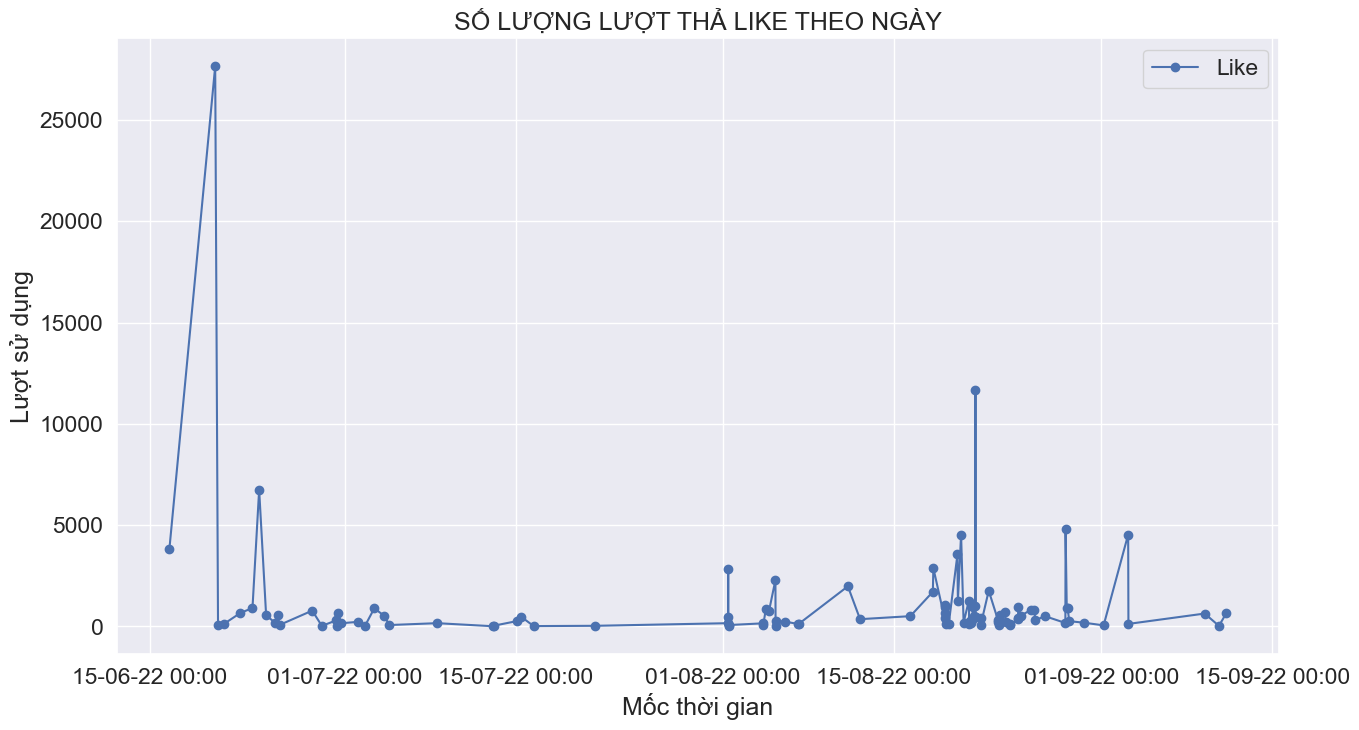

In [610]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(df_full_with_reactions['time'], df_full_with_reactions['thích'], label = "Like", marker="o")
plt.legend()
ax.set_title("SỐ LƯỢNG LƯỢT THẢ LIKE THEO NGÀY")
ax.set_xlabel("Mốc thời gian")
ax.set_ylabel("Lượt sử dụng")
from matplotlib.dates import DateFormatter
ax.xaxis.set_major_formatter(DateFormatter('%d-%m-%y %H:%M'))

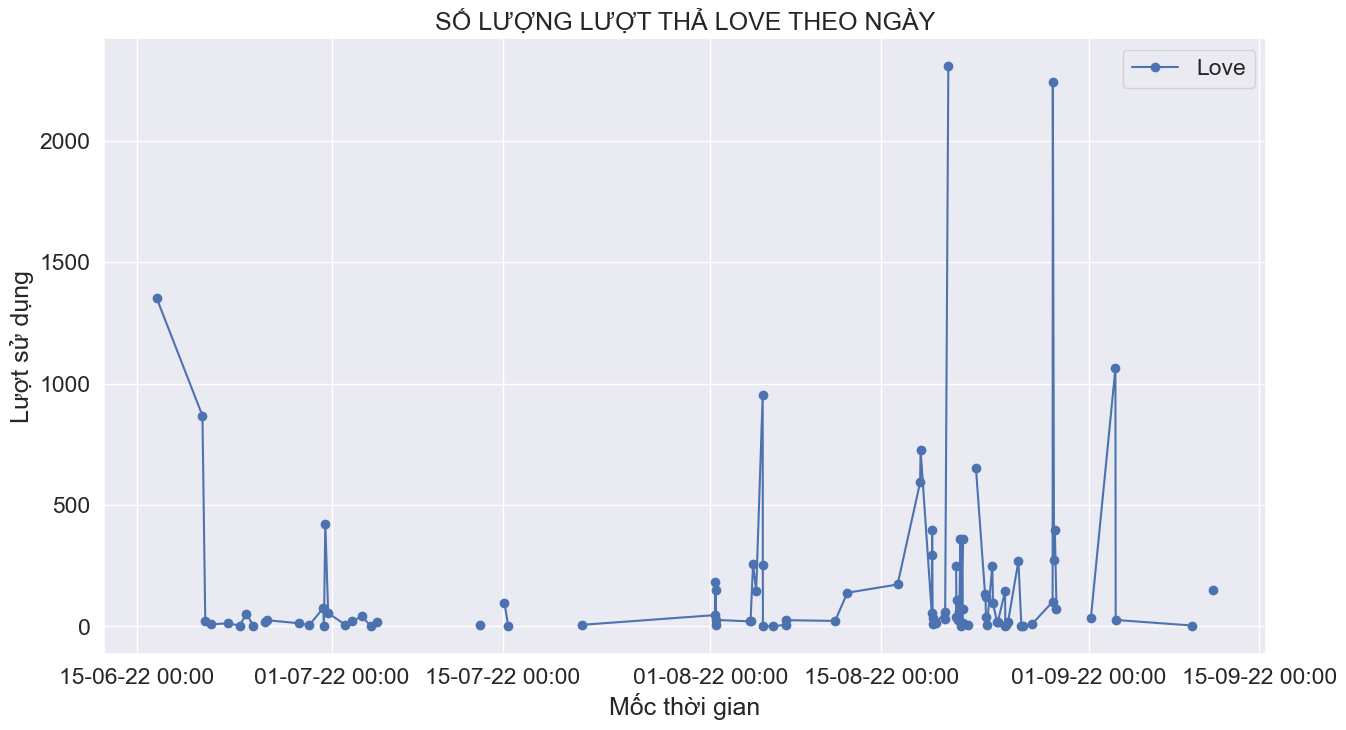

In [611]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(df_full_with_reactions['time'], df_full_with_reactions['yêu thích'], label = "Love", marker="o")
plt.legend()
ax.set_title("SỐ LƯỢNG LƯỢT THẢ LOVE THEO NGÀY")
ax.set_xlabel("Mốc thời gian")
ax.set_ylabel("Lượt sử dụng")
from matplotlib.dates import DateFormatter
ax.xaxis.set_major_formatter(DateFormatter('%d-%m-%y %H:%M'))

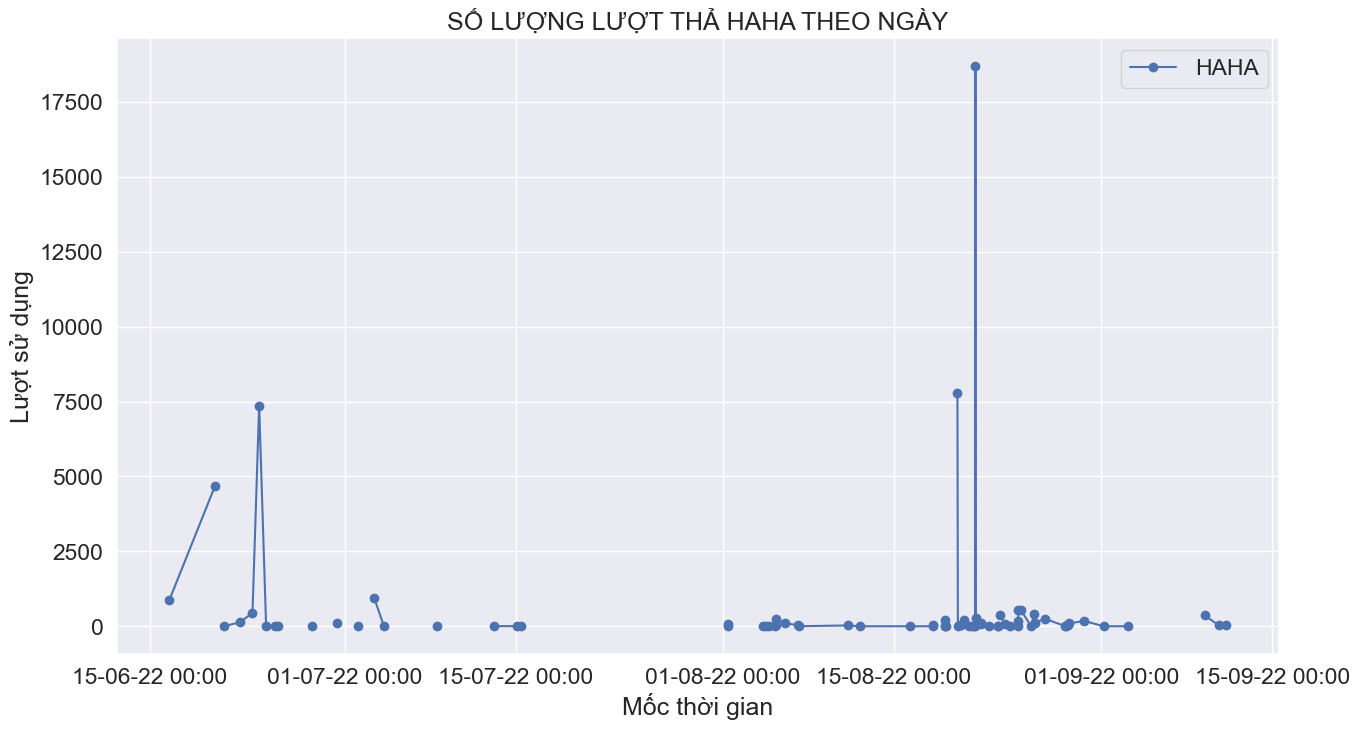

In [612]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(df_full_with_reactions['time'], df_full_with_reactions['haha'], label = "HAHA", marker="o")
plt.legend()
ax.set_title("SỐ LƯỢNG LƯỢT THẢ HAHA THEO NGÀY")
ax.set_xlabel("Mốc thời gian")
ax.set_ylabel("Lượt sử dụng")
from matplotlib.dates import DateFormatter
ax.xaxis.set_major_formatter(DateFormatter('%d-%m-%y %H:%M'))

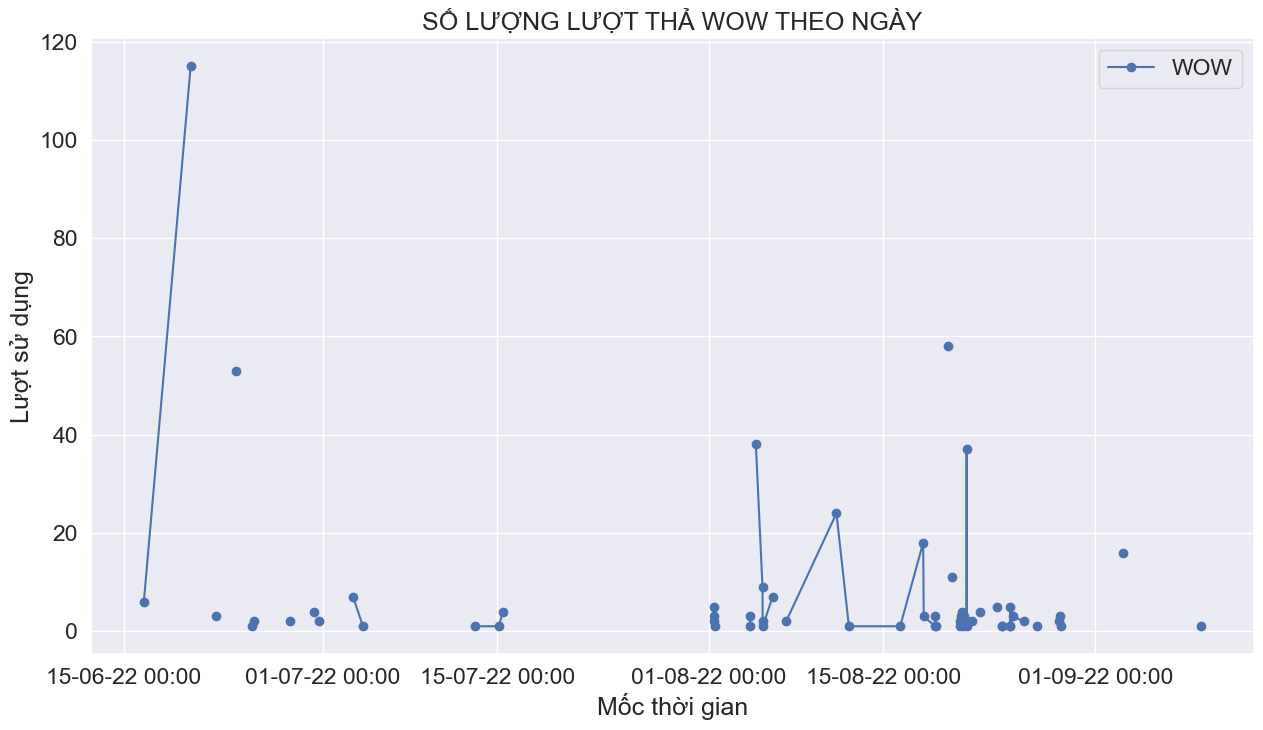

In [613]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(df_full_with_reactions['time'], df_full_with_reactions['wow'], label = "WOW", marker="o")
plt.legend()
ax.set_title("SỐ LƯỢNG LƯỢT THẢ WOW THEO NGÀY")
ax.set_xlabel("Mốc thời gian")
ax.set_ylabel("Lượt sử dụng")
from matplotlib.dates import DateFormatter
ax.xaxis.set_major_formatter(DateFormatter('%d-%m-%y %H:%M'))

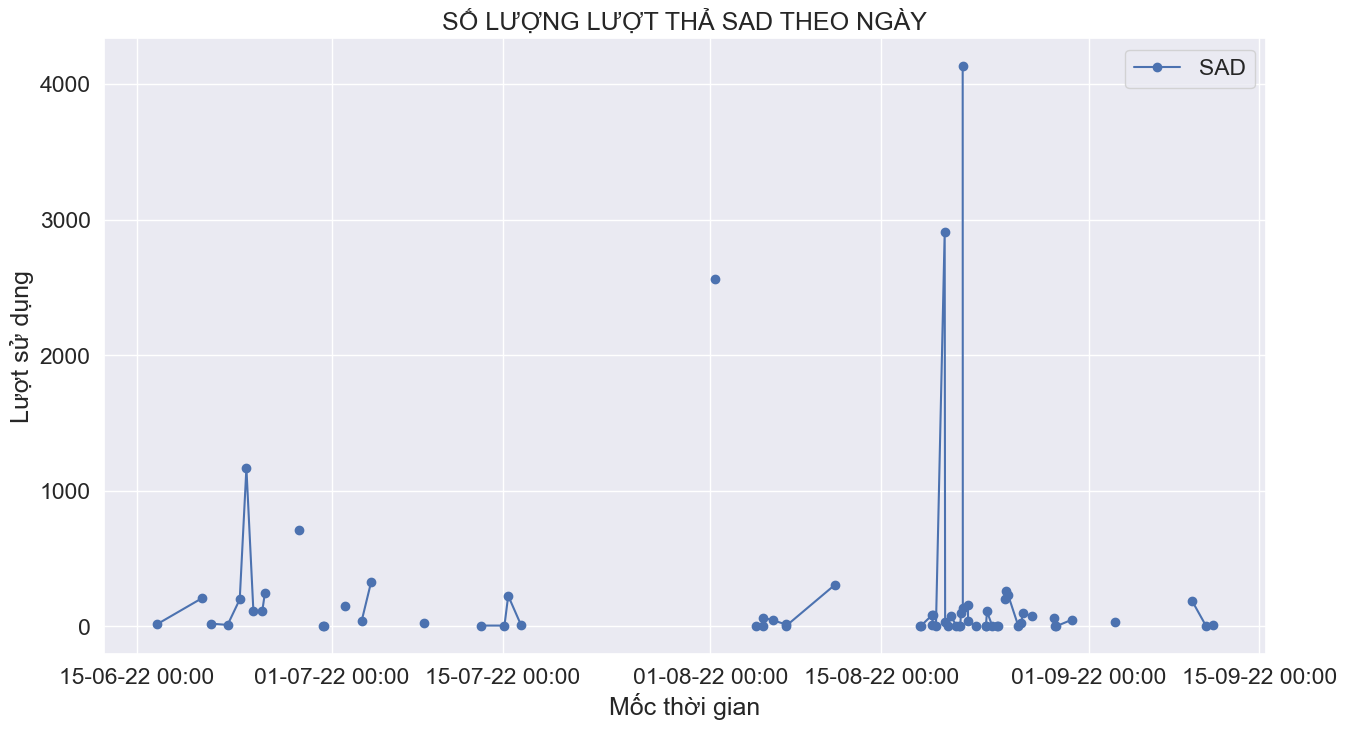

In [615]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(df_full_with_reactions['time'], df_full_with_reactions['buồn'], label = "SAD", marker="o")
plt.legend()
ax.set_title("SỐ LƯỢNG LƯỢT THẢ SAD THEO NGÀY")
ax.set_xlabel("Mốc thời gian")
ax.set_ylabel("Lượt sử dụng")
from matplotlib.dates import DateFormatter
ax.xaxis.set_major_formatter(DateFormatter('%d-%m-%y %H:%M'))

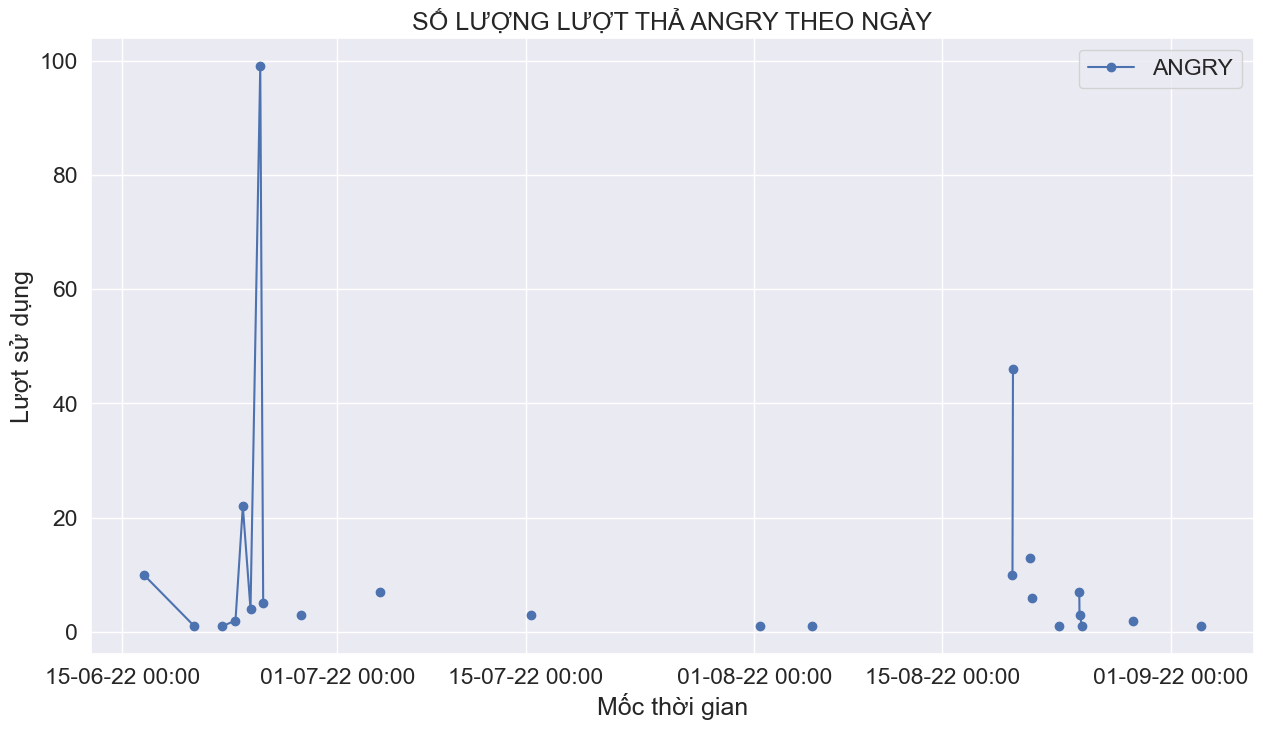

In [619]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(df_full_with_reactions['time'], df_full_with_reactions['phẫn nộ'], label = "ANGRY", marker="o")
plt.legend()
ax.set_title("SỐ LƯỢNG LƯỢT THẢ ANGRY THEO NGÀY")
ax.set_xlabel("Mốc thời gian")
ax.set_ylabel("Lượt sử dụng")
from matplotlib.dates import DateFormatter
ax.xaxis.set_major_formatter(DateFormatter('%d-%m-%y %H:%M'))

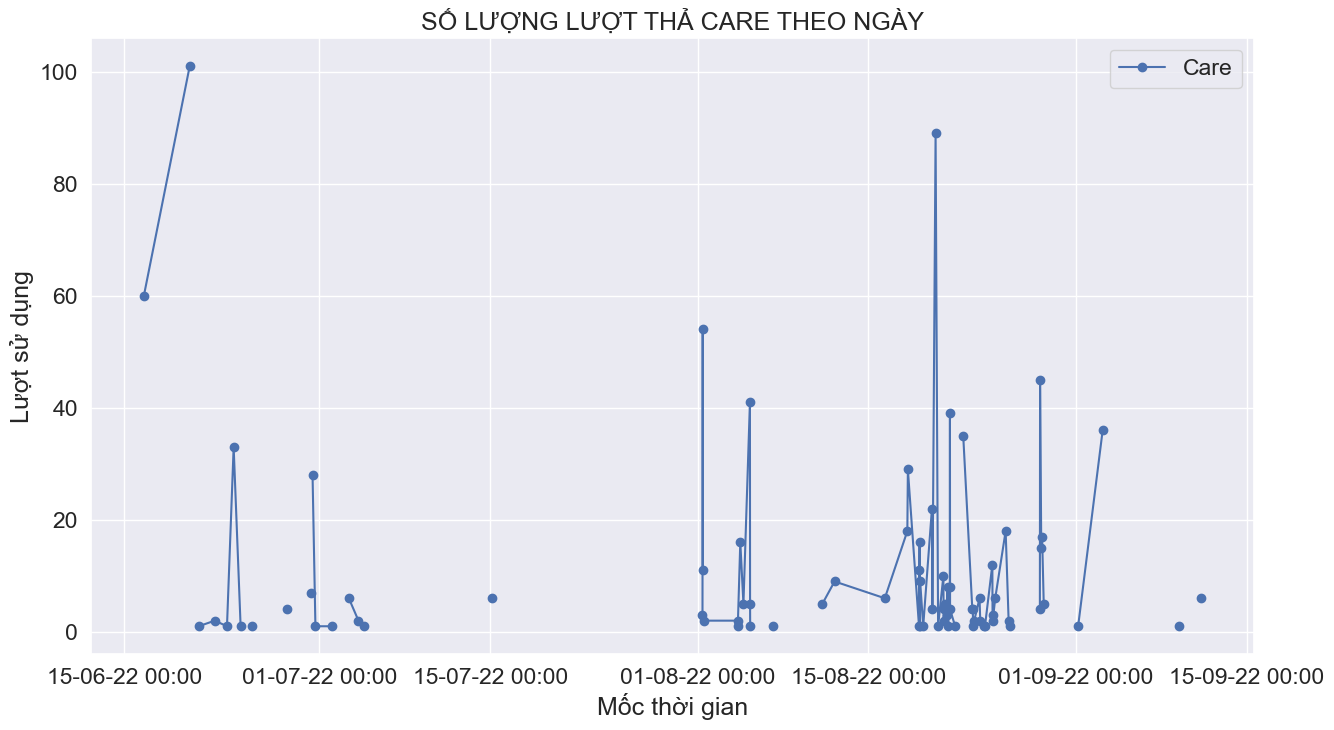

In [620]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(df_full_with_reactions['time'], df_full_with_reactions['thương thương'], label = "Care", marker="o")
plt.legend()
ax.set_title("SỐ LƯỢNG LƯỢT THẢ CARE THEO NGÀY")
ax.set_xlabel("Mốc thời gian")
ax.set_ylabel("Lượt sử dụng")
from matplotlib.dates import DateFormatter
ax.xaxis.set_major_formatter(DateFormatter('%d-%m-%y %H:%M'))

In [584]:
date = [str(timestamp).split(" ")[0] for timestamp in raw_df['time']]
date_reactions = {
    'time_date': list(date),
    'total of reactions':list(df_full_with_reactions['reaction_count'])
}
df = pd.DataFrame(date_react)
display(df)

time_date  total of reactions
0   2022-09-11                 857
1   2022-09-10                  55
2   2022-09-09                1192
3   2022-09-03                 150
4   2022-09-03                5685
..         ...                 ...
95  2022-06-22                 829
96  2022-06-21                 162
97  2022-06-20                 100
98  2022-06-20               33644
99  2022-06-16                6114

[100 rows x 2 columns]

In [585]:
#tính tổng reaction theo tháng
#thêm các cột type of reaction để tính barplot
date_year = [str(timestamp).split("-")[0] for timestamp in date_reactions['time_date']]
date_month= [str(timestamp).split("-")[1] for timestamp in date_reactions['time_date']]
total = {
    'date': list(date_time['date']),
    'year': list(date_year),
    'month': list(date_month),
    'reaction_count': list(df_full_with_reactions['reaction_count'])
}
df1 = pd.DataFrame(total)
df1[['date', 'year','month','reaction_count']]


date  year month  reaction_count
0   2022-06-16  2022    09             857
1   2022-06-20  2022    09              55
2   2022-06-20  2022    09            1192
3   2022-06-21  2022    09             150
4   2022-06-22  2022    09            5685
..         ...   ...   ...             ...
95  2022-09-03  2022    06             829
96  2022-09-03  2022    06             162
97  2022-09-09  2022    06             100
98  2022-09-10  2022    06           33644
99  2022-09-11  2022    06            6114

[100 rows x 4 columns]

In [586]:
type_reaction = pd.concat([df_full_with_reactions, df1], axis=1)
type_reaction.drop('reaction_count', axis=1)
type_reaction[['date','post_id','thích','yêu thích','haha','wow','buồn','phẫn nộ','thương thương',
                                 'shares','comments','reaction_count']]

date           post_id    thích  yêu thích    haha    wow   buồn  \
0   2022-06-16   621831346134146    641.0      151.0    46.0    NaN   13.0   
1   2022-06-20   621301309520483     25.0        NaN    29.0    NaN    1.0   
2   2022-06-20   620203652963582    634.0        4.0   362.0    1.0  190.0   
3   2022-06-21   615225000128114    123.0       27.0     NaN    NaN    NaN   
4   2022-06-22   615210750129539   4535.0     1063.0     1.0   16.0   33.0   
..         ...               ...      ...        ...     ...    ...    ...   
95  2022-09-03  1178552979663046    661.0       13.0   138.0    3.0   11.0   
96  2022-09-03  1177737839744560    130.0        9.0     2.0    NaN   20.0   
97  2022-09-09  1177414076443603     77.0       23.0     NaN    NaN    NaN   
98  2022-09-10  1177254746459536  27650.0      868.0  4699.0  115.0  210.0   
99  2022-09-11  1174643956720615   3796.0     1353.0   875.0    6.0   14.0   

    phẫn nộ  thương thương  shares  comments  reaction_count  reaction_count  
0       NaN            6.0      51       134             857             857  
1       NaN            NaN       0         0              55              55  
2       NaN            1.0     104        74            1192            1192  
3       NaN            NaN      17         3             150             150  
4       1.0           36.0      77       135            5685            5685  
..      ...            ...     ...       ...             ...             ...  
95      1.0            2.0      14        23             829             829  
96      NaN            1.0       1         3             162             162  
97      NaN            NaN       1         0             100             100  
98      1.0          101.0     171       914           33644           33644  
99     10.0           60.0     179       864            6114            6114  

[100 rows x 13 columns]

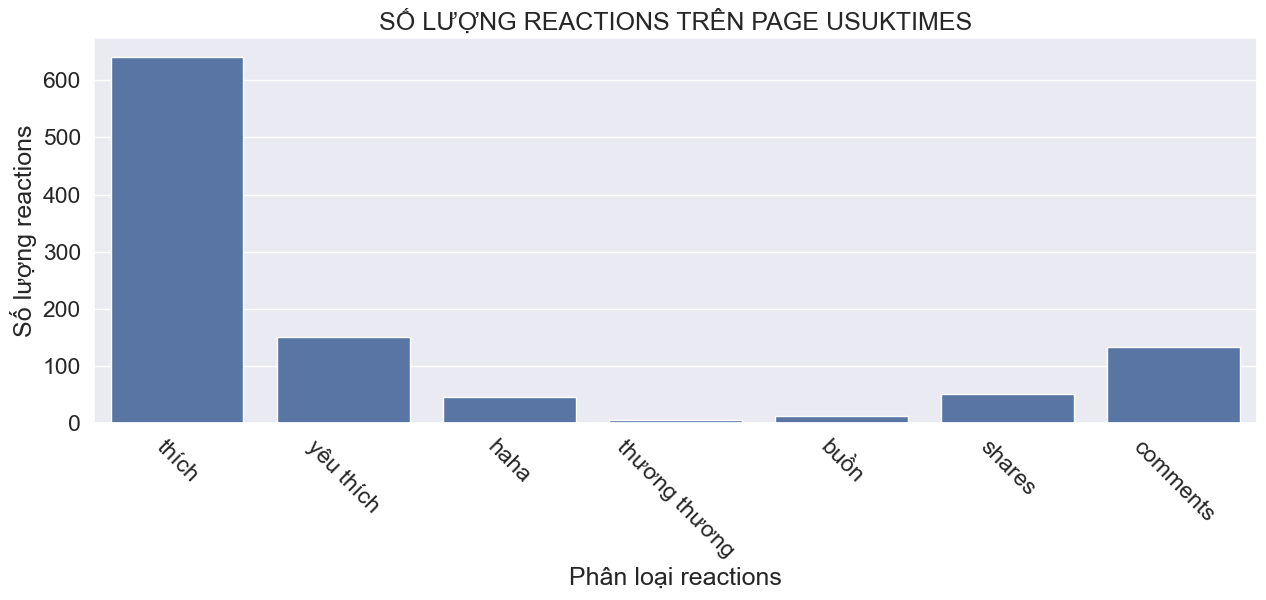

In [587]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,5)})
sns.set(font_scale=1.5)

# plot the reactions
fig, ax = plt.subplots()
ax = sns.barplot(x=list(reactions.keys()), y=list(reactions.values()))
ax.set_title("SỐ LƯỢNG REACTIONS TRÊN PAGE USUKTIMES")
ax.set_ylabel("Số lượng reactions")
ax.set_xlabel("Phân loại reactions")
plt.xticks(rotation=-45)
plt.show()

In [625]:
df_full_with_reactions[['thích','yêu thích','haha','wow','buồn','phẫn nộ','thương thương']].corrwith(post_df_full_with_reactions['shares'])


thích            0.491506
yêu thích        0.393016
haha             0.631485
wow              0.508830
buồn             0.523220
phẫn nộ          0.098886
thương thương    0.563448
dtype: float64

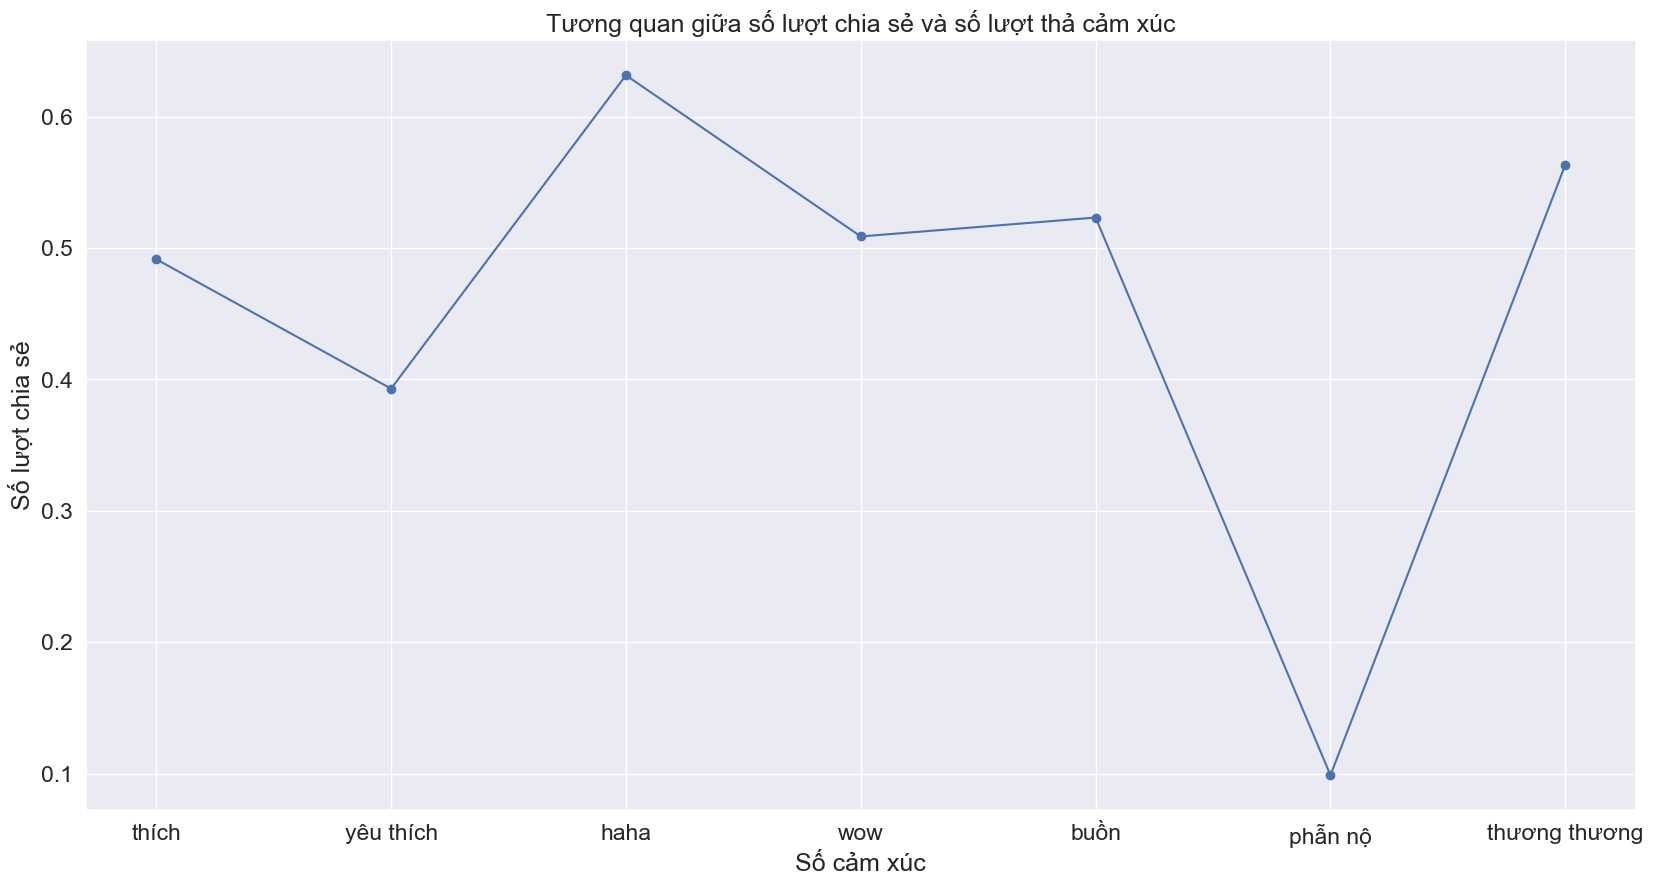

In [588]:
correlations = df_full_with_reactions[['thích','yêu thích','haha','wow','buồn','phẫn nộ','thương thương']].corrwith(post_df_full_with_reactions['shares'])

# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(correlations, marker='o')
ax.set_title("Tương quan giữa số lượt chia sẻ và số lượt thả cảm xúc")
ax.set_ylabel("Số lượt chia sẻ")
ax.set_xlabel("Số cảm xúc")

# Hiển thị biểu đồ
plt.show()

In [589]:
x = []
x.append(df_full_with_reactions['thích'].sum())
x.append(df_full_with_reactions['yêu thích'].sum())
x.append(df_full_with_reactions['haha'].sum())
x.append(df_full_with_reactions['thương thương'].sum()+df_full_with_reactions['phẫn nộ'].sum() + df_full_with_reactions['buồn'].sum()
         + df_full_with_reactions['wow'].sum())
x

[114001.0, 17555.0, 46030.0, 17446.0]

Text(0.5, 1.0, 'TỈ LỆ PHẦN TRĂM CỦA CÁC BIỂU TƯỢNG CẢM XÚC')

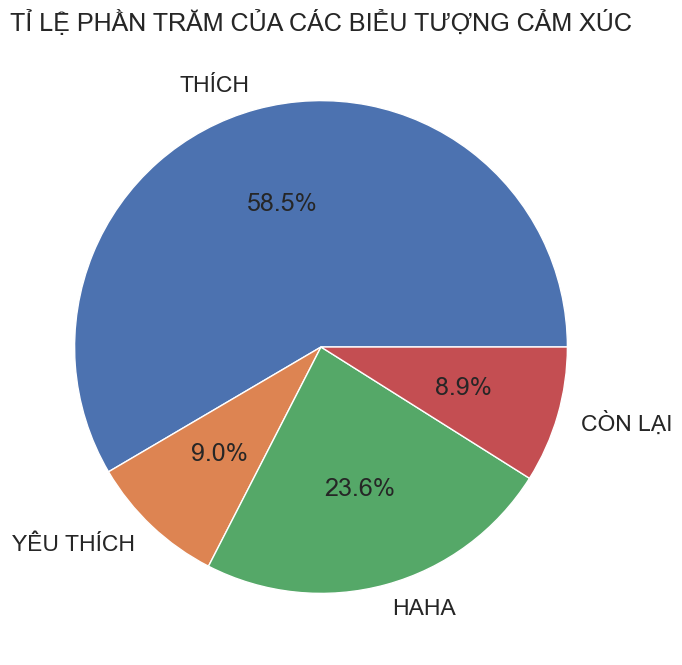

In [621]:
plt.figure(figsize=(10, 8))
plt.pie(x,
        labels = ['THÍCH','YÊU THÍCH','HAHA','CÒN LẠI'], 
        autopct = '%1.1f%%', # Format hiển thị giá trị %
        shadow = False)
plt.title("TỈ LỆ PHẦN TRĂM CỦA CÁC BIỂU TƯỢNG CẢM XÚC", fontsize=18)

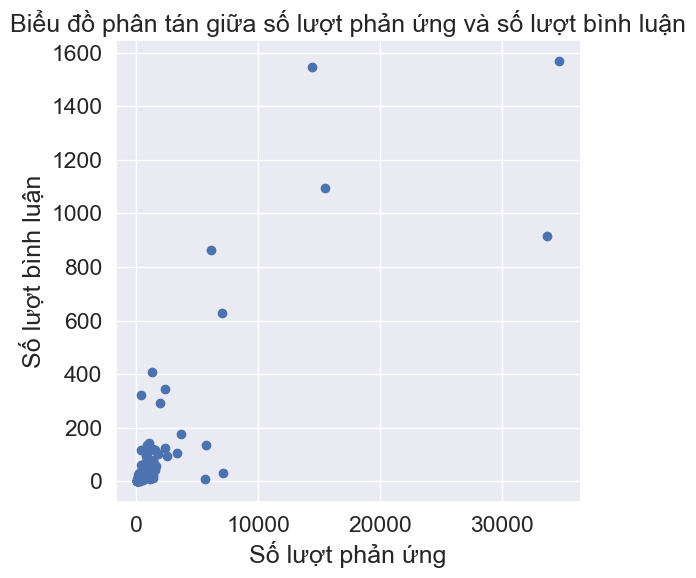

In [591]:
# Vẽ biểu đồ phân tán
plt.figure(figsize=(6, 6))
plt.scatter(df_full_with_reactions['reaction_count'], df_full_with_reactions['comments'])

# Đặt nhãn cho trục x và y
plt.xlabel('Số lượt phản ứng')
plt.ylabel('Số lượt bình luận')

# Đặt tiêu đề cho biểu đồ
plt.title('Biểu đồ phân tán giữa số lượt phản ứng và số lượt bình luận')

# Hiển thị biểu đồ
plt.show()

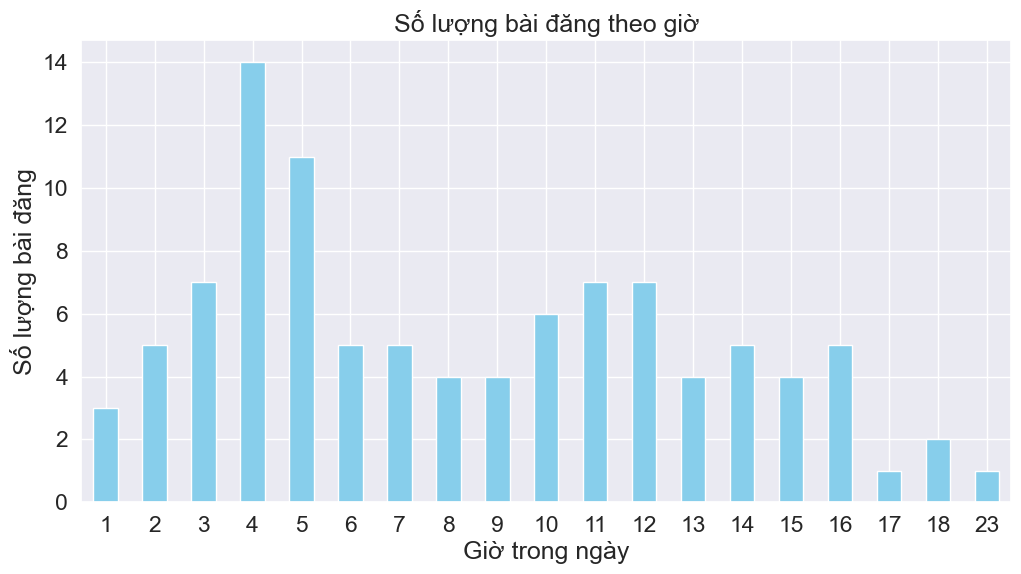

In [592]:
import pandas as pd
import matplotlib.pyplot as plt

# Đảm bảo cột 'time' trong DataFrame có định dạng datetime
if not pd.api.types.is_datetime64_any_dtype(df_full_with_reactions['time']):
    df_full_with_reactions['time'] = pd.to_datetime(df_full_with_reactions['time'])

# Tạo cột mới 'hour' để lưu giờ đăng bài
df_full_with_reactions['hour'] = df_full_with_reactions['time'].dt.hour

# Tính tổng số bài đăng theo giờ
posts_by_hour = df_full_with_reactions.groupby('hour').size()

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
posts_by_hour.plot(kind='bar', color='skyblue')
plt.title('Số lượng bài đăng theo giờ')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Số lượng bài đăng')
plt.xticks(rotation=0)
plt.show()

## Read all posts

In [622]:
df_full_with_reactions['post_text']
text = "" 
for i in df_full_with_reactions['post_text']:
  text=text+i+"\n"
print(text)

Một số người Việt: chê cười Anh Mỹ phân biệt chủng tộc chèn ép người da màu

Cũng là họ: Sử dụng những từ ngữ phân biệt chủng tộc kinh khủng nhất để đùa giỡn, chửi mắng, miệt thị nữ diên viên da màu đang thủ vai Ariel (không đánh đồng với những ai chỉ góp ý không hài lòng vì diễn viên khác nguyên tác)

Tưởng tượng ngày trước chê Anh Mỹ nhưng bây giờ lại hùa theo phân biệt chủng tộc chỉ vì việc diễn viên da màu thủ vai nhân vật da trắng

Và cũng ngộ, khi người da đen/người gốc Phi thủ vai nhân vật da trắng thì họ chê cười, đổ thừa BLM, bảo hùa công thức Oscar nữ quyền da màu LGBT này nọ. Nhưng không bao giờ thấy họ nói như thế khi nữ diễn viên gốc Á Gemma Chan thủ vai nhân vật da trắng có thật trong phim Mary Queen of Scot, hay nam diễn viên gốc Ấn Dev Patel thủ vai nhân vật truyền thuyết người Anh trong phim The Green Knight. Cùng với những diễn viên Châu Á khác đã từng đóng vai Ariel trên các phiên bản chuyển thể truyền hình và sân khấu

Có hàng loạt diễn viên gốc Á khác ở Hollywood c

In [627]:
post_textt = raw_df[['post_text' , 'reaction_count']]
maxx = post_textt ['reaction_count'].max()
post_reaction_max = post_textt[post_textt['reaction_count'] == maxx]
print('Số lượt tương tác: ', post_reaction_max['reaction_count'].iloc[0])
print(post_reaction_max['post_text'].iloc[0])

Số lượt tương tác:  34670
Tôi mỗi khi tìm nhạc kiểu:


In [632]:
post_texttt = raw_df[['post_text' , 'reaction_count']]
minn = post_texttt ['reaction_count'].min()
post_reaction_min = post_texttt[post_texttt['reaction_count'] == minn]
print('Số lượt tương tác: ', post_reaction_min['reaction_count'].iloc[0])
print(post_reaction_min['post_text'].iloc[0])

Số lượt tương tác:  14
Jessie Ware sẽ phát hành single mở đường "Free Yourself" cho album phòng thu tiếp theo của cô vào ngày 19/7 tới đây.

Hiện tại đã có thể pre-order trên mọi nền tảng


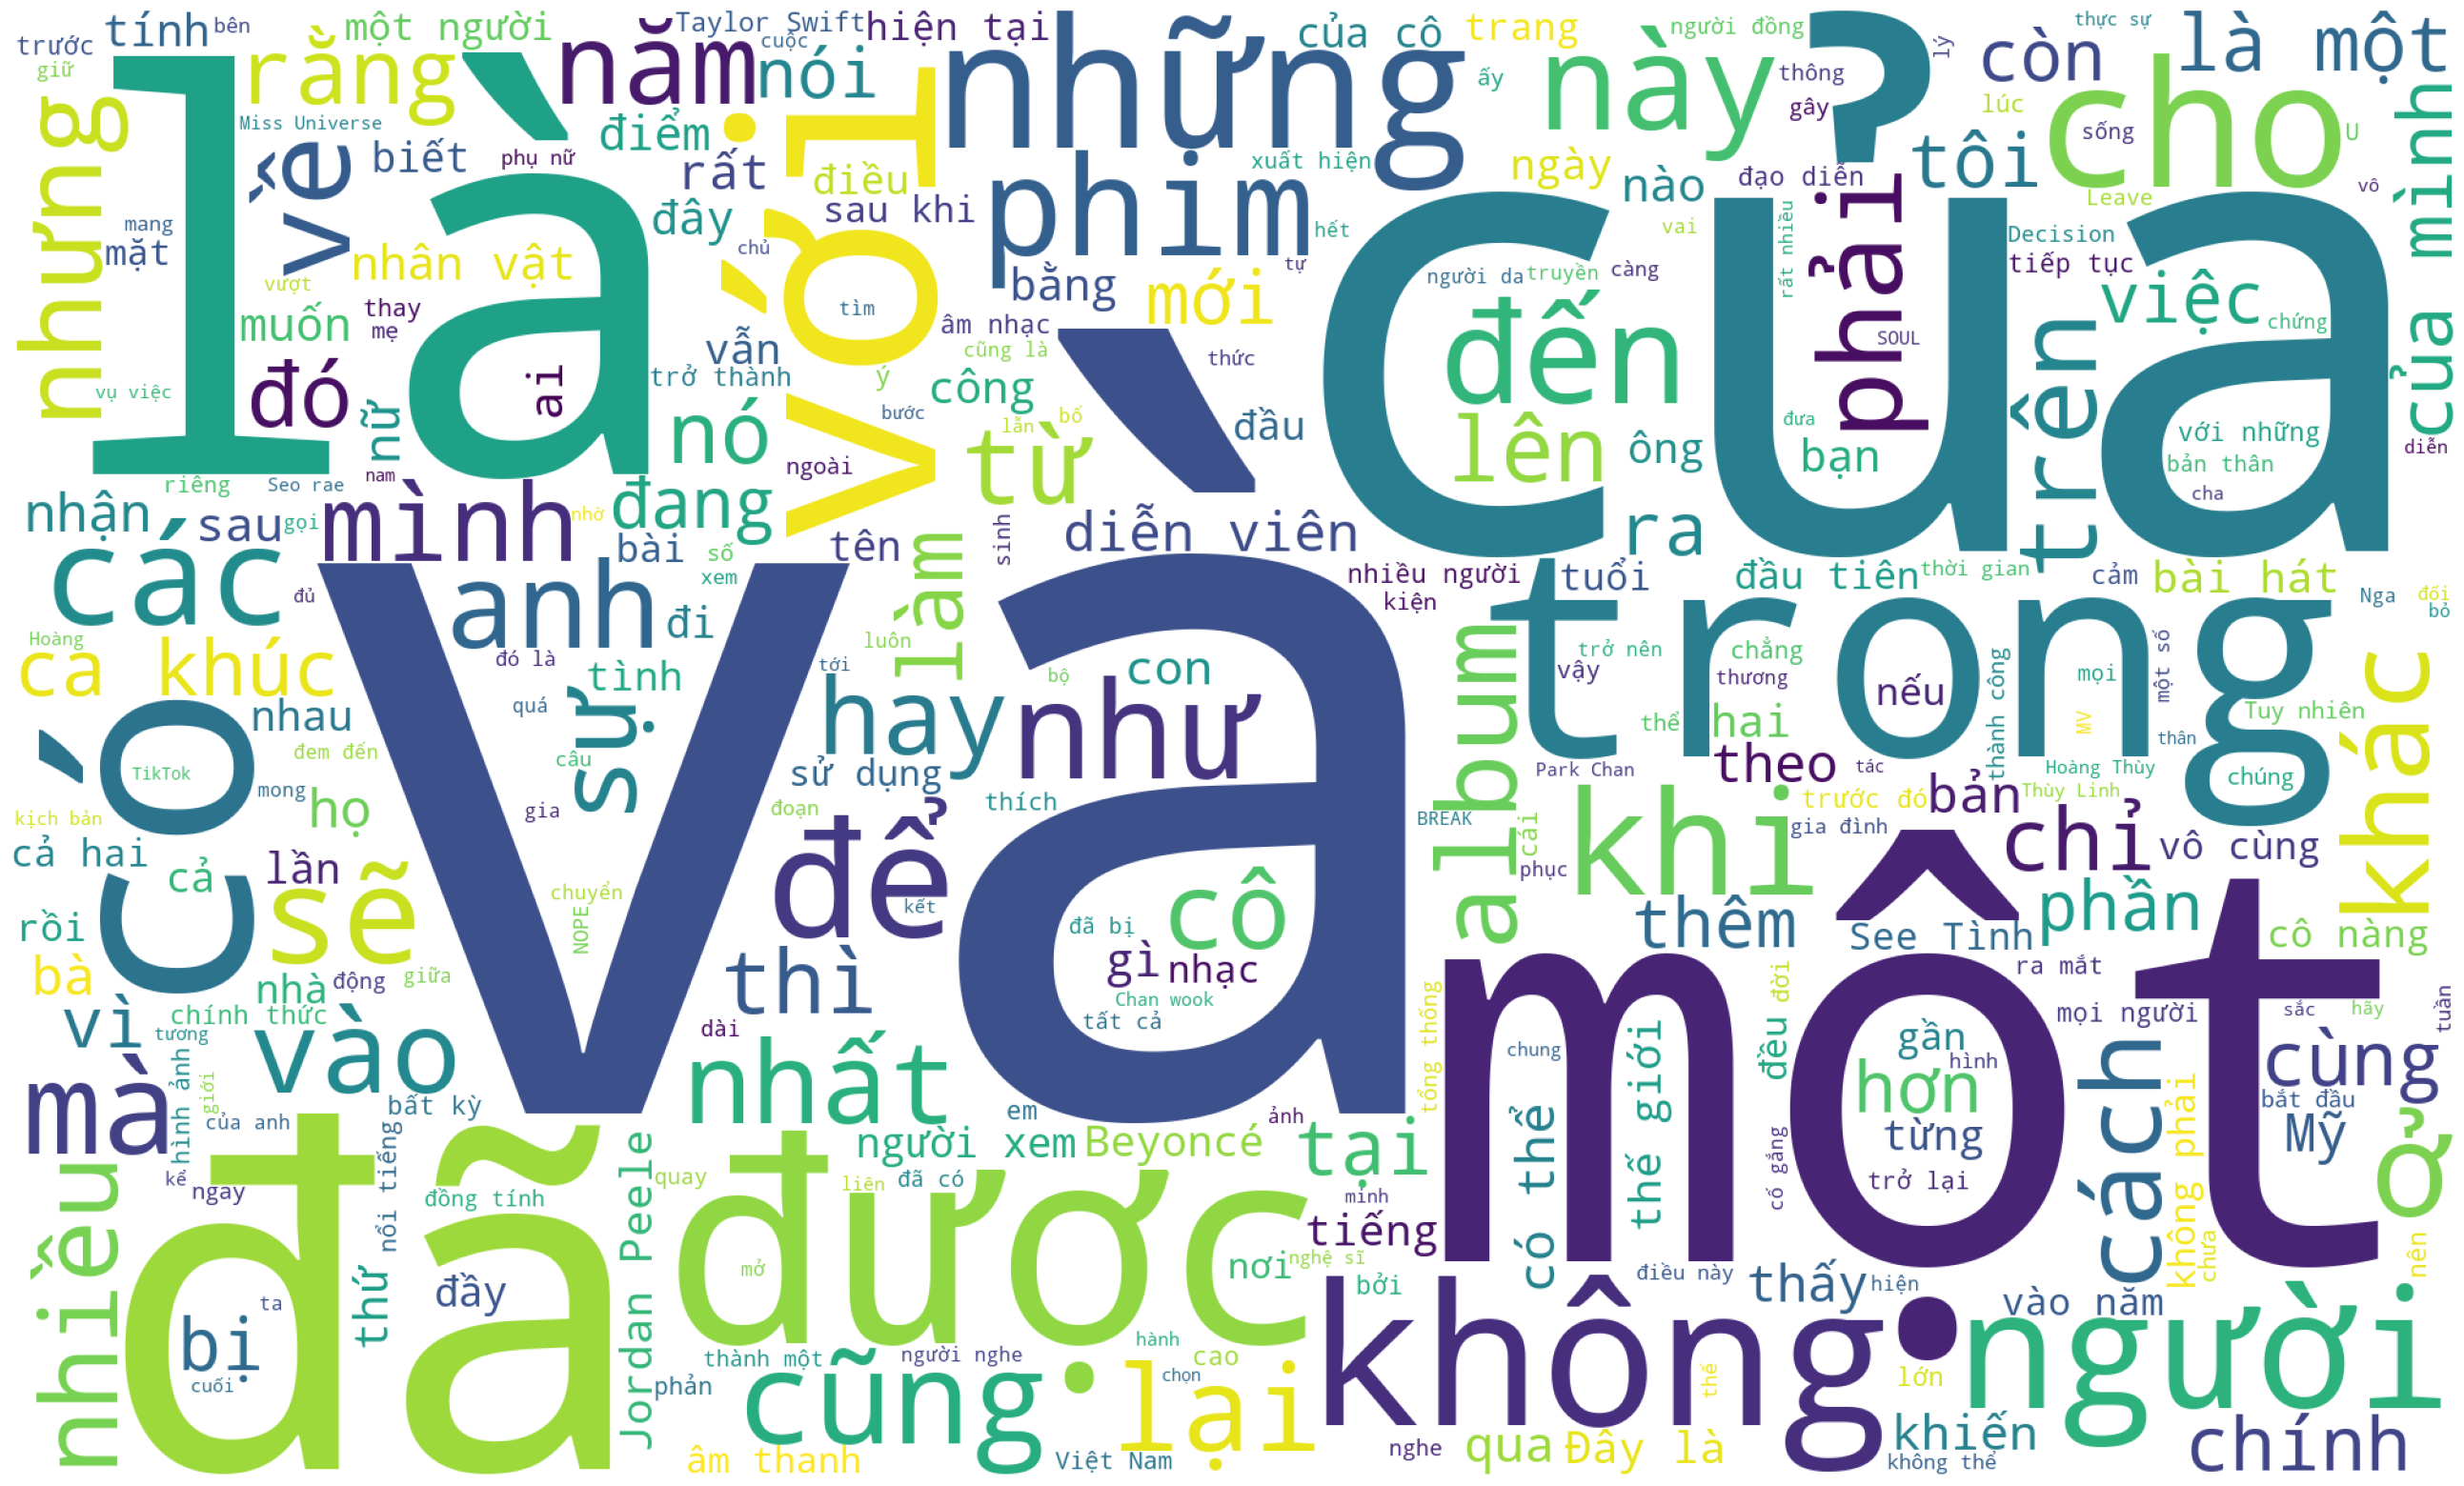

In [636]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [648]:
path="Data/usuktimes.npy"
post_list = np.load(path,allow_pickle=True)
post_df_full = pd.read_excel("Data/usuktimes .xlsx")

In [649]:
post_list=post_list.tolist()

In [650]:
res =[]
for post in post_list:
	if len(post['comments_full']) > 0:
	    print(post['comments_full'])
	    for comment in post['comments_full']:
	        cmt = '\n'.join([comment['comment_text'] for comment in post ['comments_full']])
	        res.append(cmt)
print(len(res))
print(res)

[{'comment_id': '772081764063187', 'comment_url': 'https://facebook.com/772081764063187', 'commenter_id': '105742761352785', 'commenter_url': 'https://facebook.com/Page-comment-dạo-105742761352785/?rc=p&refid=52&__tn__=%7ER', 'commenter_name': 'Page comment dạo', 'commenter_meta': None, 'comment_text': 'Ở đây người ta chê là đi quá xa so với nguyên tác thôi mà chứ đâu có phân biệt gì, còn bà nữ hoàng lên twitter cũng nhiều người chửi kinh chứ đâu phải mỗi người việt', 'comment_time': datetime.datetime(2022, 9, 10, 23, 6), 'comment_image': 'https://scontent.ftir6-1.fna.fbcdn.net/m1/v/t6/An_UvxJXg9tdnLU3Y5qjPi0200MLilhzPXUgxzGjQzUMaNcmjdZA6anyrngvkdub33NZzZhd51fpCAEzNHFhko5aKRFP5fS1w_lKwYrzcNLupv27.png?ccb=10-5&oh=00_AT_qbKYI6IncUXkLfSdqrKOqv1pHI_hCEdutUDSRxviP2w&oe=63218CF9&_nc_sid=55e238', 'comment_reactors': [{'name': 'Quốc Đạt', 'link': 'https://facebook.com/profile.php?id=100010674425336&fref=pb', 'type': 'like'}, {'name': 'Hiên', 'link': 'https://facebook.com/ddoanthuhien?fref=pb',

In [656]:
%pip install -U nltk
%pip install rake-nltk

     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     -- ------------------------------------- 0.1/1.5 MB 1.3 MB/s eta 0:00:02
     ----------- ---------------------------- 0.4/1.5 MB 3.8 MB/s eta 0:00:01
     ------------------------- -------------- 1.0/1.5 MB 6.0 MB/s eta 0:00:01
     -------------------------------- ------- 1.2/1.5 MB 6.1 MB/s eta 0:00:01
     ---------------------------------------- 1.5/1.5 MB 6.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/97.9 kB ? eta -:--:--
   ---------------------------------------- 97.9/97.9 kB 5.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/302.2 kB ? eta -:--:--
   --------------------------------------- 302.2/302.2 kB 19.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [662]:
import nltk
print('The nltk version is {}.'.format(nltk.__version__))

The nltk version is 3.8.1.


In [663]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk import tokenize
import math
from operator import itemgetter

stop_words = ['đã không', 'gần hết', 'tỏ ra', 'nói nhỏ', 'thúng thắng', 'từ loại', 'bao nhiêu', 'ăn làm', 'phỉ phui', 'chứ như', 'vung thiên địa', 'sang sáng', 'tại đâu', 'ông từ', 'giữa lúc', 'giờ đây', 'câu hỏi', 'không điều kiện', 'khẳng định', 'chốc chốc', 'lấy ra', 'nước xuống', 'nói là', 'sau đó', 'là phải', 'về không', 'dành dành', 'làm tăng', 'có tháng', 'tất cả bao nhiêu', 'nhìn theo', 'ơ kìa', 'cho được', 'ầu ơ', 'trong này', 'ối giời', 'tránh khỏi', 'ứ hự', 'chẳng nữa', 'cần số', 'phải rồi', 'đã thế', 'khó chơi', 'ờ ờ', 'sẽ hay', 'đưa chuyện', 'lượng số', 'cơ cùng', 'cho rằng', 'lúc này', 'quan trọng', 'ăn chung', 'vài điều', 'đang tay', 'lòng không', 'tới nơi', 'chết thật', 'cha chả', 'tăng cấp', 'ý chừng', 'đưa em', 'căn tính', 'chắc người', 'này nọ', 'rén bước', 'mỗi lúc', 'căn cắt', 'bất kể', 'ai nấy', 'ba ngày', 'bất quá', 'ráo cả', 'chu cha', 'bằng nào', 'đủ nơi', 'thực vậy', 'tại nơi', 'tha hồ', 'ăn hỏi', 'sử dụng', 'cảm ơn', 'ào vào', 'duy chỉ', 'đâu đây', 'ngộ nhỡ', 'vài nơi', 'biết mình', 'thường tại', 'trong mình', 'ô kìa', 'trước đây', 'vừa lúc', 'đâu cũng', 'thời điểm', 'từng ấy', 'ở được', 'cùng cực', 'khó nghĩ', 'vùng nước', 'quá tuổi', 'cật sức', 'thiếu điểm', 'dạ khách', 'chắc ăn', 'lần khác', 'tột cùng', 'tuần tự', 'những là', 'tự ý', 'bởi thế', 'thục mạng', 'trước ngày', 'tuốt tuồn tuột', 'trong ngoài', 'hiện nay', 'dù cho', 'thuộc bài', 'nữa khi', 'chịu chưa', 'không hay', 'thật sự', 'thà rằng', 'đặt mức', 'thậm từ', 'nhằm vào', 'dù sao', 'như không', 'bấy lâu nay', 'tuyệt nhiên', 'ngày đến', 'thích ý', 'thế sự', 'nghe chừng', 'đúng ngày', 'bộ thuộc', 'để giống', 'chưa dễ', 'ông nhỏ', 'thấy tháng', 'ba họ', 'vì chưng', 'càng hay', 'lấy có', 'tự lượng', 'thích tự', 'cơ mà', 'thật ra', 'thích cứ', 'ra ngôi', 'chuyển tự', 'ở đây', 'xon xón', 'dẫu rằng', 'ra tay', 'thường thôi', 'vì rằng', 'bất kì', 'xin gặp', 'thuần ái', 'lúc đi', 'đủ số', 'dễ thấy', 'nhờ đó', 'hơn là', 'thoạt nghe', 'ví phỏng', 'mà lại', 'nhanh lên', 'người khách', 'quả là', 'chưa dùng', 'cứ điểm', 'mỗi lần', 'lượng từ', 'nói riêng', 'khác nào', 'trời đất ơi', 'vị tất', 'bỏ mình', 'nói khó', 'quá mức', 'vèo vèo', 'từ tại', 'cuối cùng', 'phải cách', 'nhận nhau', 'ngày này', 'đáng lý', 'trước khi', 'sở dĩ', 'do vì', 'thường tính', 'đúng với', 'chung cho', 'mà không', 'phải biết', 'ái chà', 'hết nói', 'đâu đâu', 'chành chạnh', 'bỗng nhiên', 'có chăng là', 'ba tăng', 'trừ phi', 'ông tạo', 'như quả', 'nhất nhất', 'đưa tay', 'ngôi thứ', 'về phần', 'trệu trạo', 'sang năm', 'tấm bản', 'để phần', 'bỏ lại', 'từ đó', 'vừa mới', 'sì sì', 'thậm cấp', 'buổi sớm', 'bỏ mất', 'hay hay', 'gây giống', 'hay tin', 'nơi nơi', 'tại đây', 'hết của', 'dễ gì', 'tính cách', 'vâng vâng', 'chùn chũn', 'con nhà', 'gặp khó khăn', 'đều nhau', 'đại loại', 'nếu như', 'một khi', 'trong số', 'qua ngày', 'không ai', 'nói lại', 'riêng từng', 'nghĩ xa', 'lời nói', 'chứ không phải', 'lần tìm', 'trước tiên', 'cả người', 'trong vùng', 'tới gần', 'quả thế', 'thường khi', 'ông ấy', 'tháng ngày', 'xa xả', 'dễ dùng', 'ví bằng', 'chung quy', 'lấy làm', 'thấp thỏm', 'cây nước', 'cô ấy', 'đặc biệt', 'nào là', 'vào khoảng', 'kể như', 'tạo ra', 'dầu sao', 'về nước', 'nhón nhén', 'thích thuộc', 'sáng rõ', 'lại nữa', 'thực hiện', 'chưa từng', 'bấy nay', 'cấp số', 'đặt làm', 'nhớ ra', 'vung tàn tán', 'tắp lự', 'chung cuộc', 'từ khi', 'tuy có', 'có thể', 'như thế nào', 'ối dào', 'dễ như chơi', 'lên nước', 'lấy thế', 'lên số', 'cho tới', 'chứ còn', 'trả của', 'đến thế', 'gì gì', 'trước nay', 'thảo hèn', 'lúc đó', 'nhận việc', 'mang mang', 'không những', 'nào phải', 'trước đó', 'lớn nhỏ', 'thì thôi', 'tuổi cả', 'ra ý', 'quá tin', 'tuy rằng', 'dễ ngươi', 'con dạ', 'để không', 'cứ như', 'bên cạnh', 'tò te', 'chịu tốt', 'không kể', 'nức nở', 'lấy được', 'bỏ xa', 'lấy giống', 'tự tính', 'đến khi', 'vừa rồi', 'chết tiệt', 'sau cùng', 'cao thế', 'sao đang', 'qua chuyện', 'chỉ là', 'cả ăn', 'ba bản', 'ngồi bệt', 'làm dần dần', 'mang nặng', 'rồi đây', 'ăn sáng', 'cả nghĩ', 'cho đến khi', 'tình trạng', 'phần nào', 'tanh tanh', 'không gì', 'đưa cho', 'gì đó', 'sao bằng', 'ra gì', 'bước tới', 'tiếp tục', 'lấy cả', 'chung cục', 'xem ra', 'vậy mà', 'nhằm khi', 'trả ngay', 'có người', 'lên cao', 'phần việc', 'thuộc lại', 'hết cả', 'bất thình lình', 'trực tiếp', 'ấy là', 'ngay lập tức', 'ở vào', 'ai đó', 'cùng tuổi', 'dù rằng', 'vốn dĩ', 'bởi ai', 'thốt nhiên', 'từng phần', 'bằng người', 'số người', 'lại người', 'vài nhà', 'nhờ có', 'khi trước', 'hay sao', 'nữa rồi', 'bấy lâu', 'đồng thời', 'dở chừng', 'đánh giá', 'tìm bạn', 'tên họ', 'mất còn', 'khác nhau', 'dẫu mà', 'ngồi sau', 'chỉ tên', 'ngồi trệt', 'lên ngôi', 'dùng hết', 'vào đến', 'cũng vậy thôi', 'nước ăn', 'cho nên', 'phía bên', 'ăn cuộc', 'nói lên', 'biết đâu đấy', 'đáo để', 'giờ đến', 'đang thì', 'liên quan', 'nhiên hậu', 'nếu có', 'tha hồ chơi', 'ngõ hầu', 'từng nhà', 'lần sang', 'chú dẫn', 'đủ dùng', 'chắc hẳn', 'được lời', 'văng tê', 'ái dà', 'chớ không', 'chính điểm', 'dễ sợ', 'chao ôi', 'khi nên', 'bằng ấy', 'như chơi', 'ôi chao', 'họ xa', 'cật lực', 'cụ thể là', 'phải lời', 'chăng nữa', 'đầy năm', 'có số', 'ơi là', 'lúc khác', 'nghe không', 'con tính', 'đầu tiên', 'sáng thế', 'thốc tháo', 'thế ra', 'vậy thì', 'còn về', 'ngay cả', 'hết ý', 'xuất hiện', 'chưa chắc', 'mọi giờ', 'nhất mực', 'sao bản', 'sắp đặt', 'làm lòng', 'ăn ngồi', 'vậy ư', 'chứ gì', 'xử lý', 'vừa khi', 'nhất luật', 'trên bộ', 'bấy chầy', 'lại quả', 'tà tà', 'cơ hồ', 'nhỏ người', 'làm nên', 'bây bẩy', 'nếu vậy', 'người khác', 'tiếp đó', 'phía dưới', 'biết đâu chừng', 'dạ dài', 'còn nữa', 'có cơ', 'tôi con', 'quá lời', 'cách đều', 'để đến nỗi', 'thế nên', 'xa xa', 'hoàn toàn', 'mở mang', 'nhất tâm', 'vài người', 'phải khi', 'vô luận', 'thời gian tính', 'sáng ý', 'thanh không', 'một lúc', 'nói phải', 'chuyển đạt', 'đầy tuổi', 'tay quay', 'chung quy lại', 'chắc chắn', 'bao giờ', 'từ căn', 'thái quá', 'lấy vào', 'chứ lị', 'biết việc', 'giữ lấy', 'đưa tới', 'tiện thể', 'khi nào', 'như vậy', 'vừa qua', 'veo veo', 'cho biết', 'ngôi nhà', 'những ai', 'nên tránh', 'đã đủ', 'tuy vậy', 'nhất thiết', 'ăn chắc', 'không có gì', 'biết bao nhiêu', 'đều bước', 'giờ lâu', 'bỏ việc', 'đại phàm', 'lại ăn', 'qua đi', 'hoặc là', 'ngay bây giờ', 'làm thế nào', 'nhất định', 'nghe thấy', 'trước tuổi', 'mà vẫn', 'tăm tắp', 'về tay', 'ạ ơi', 'nhận được', 'phía trước', 'chỉ có', 'tránh ra', 'ra người', 'không đầy', 'nghe hiểu', 'phía trên', 'lần lần', 'tỏ vẻ', 'ba ngôi', 'phía bạn', 'trong khi', 'thì ra', 'đây này', 'bỏ riêng', 'lúc lâu', 'bản ý', 'bấy giờ', 'nghe được', 'khác khác', 'cùng tột', 'coi bộ', 'bán thế', 'ô hay', 'tên tự', 'qua khỏi', 'đã vậy', 'chính bản', 'ít nhiều', 'đưa xuống', 'bỗng chốc', 'quay lại', 'không bao lâu', 'không cùng', 'nào đó', 'vẫn thế', 'hay nói', 'còn như', 'dễ thường', 'ngày xửa', 'vâng ý', 'dùng đến', 'mọi khi', 'nhờ chuyển', 'ngay tức thì', 'khó thấy', 'ngay khi đến', 'nhận biết', 'ngay từ', 'ra đây', 'chưa có', 'cái đã', 'một cách', 'của ngọt', 'do vậy', 'đánh đùng', 'quan tâm', 'lên cơn', 'bất đồ', 'bỏ không', 'ráo trọi', 'làm lấy', 'đưa vào', 'sốt sột', 'mọi thứ', 'hay nhỉ', 'khó khăn', 'ồ ồ', 'sự thế', 'lấy xuống', 'ra chơi', 'cho tới khi', 'hầu hết', 'nói rõ', 'xuất kì bất ý', 'nhà làm', 'nhận ra', 'đưa ra', 'nữa là', 'nếu cần', 'thời gian', 'thế thôi', 'đâu phải', 'qua tay', 'đâu đó', 'oai oái', 'tại đó', 'mới hay', 'nhà ngươi', 'lúc đến', 'không thể', 'nhìn nhận', 'thật vậy', 'trong lúc', 'biết đâu', 'công nhiên', 'tuy thế', 'phải lại', 'vị trí', 'bỗng dưng', 'chưa kể', 'số loại', 'tránh tình trạng', 'của tin', 'họ gần', 'xin vâng', 'thế thế', 'đây đó', 'nhận làm', 'tập trung', 'nhớ bập bõm', 'chăn chắn', 'người nhận', 'nước lên', 'không phải không', 'dẫu sao', 'chung ái', 'tức thì', 'cụ thể như', 'bài bác', 'giống như', 'suýt nữa', 'từ ái', 'đặt ra', 'phỏng như', 'có đáng', 'nhận thấy', 'trả trước', 'hơn trước', 'tìm việc', 'mỗi một', 'nếu được', 'ở như', 'chứ không', 'những như', 'chí chết', 'bỏ nhỏ', 'chưa bao giờ', 'giống người', 'hết chuyện', 'dùng làm', 'ứ ừ', 'cùng ăn', 'nhất loạt', 'xa tắp', 'luôn cả', 'lần theo', 'không cần', 'lấy ráo', 'đến lời', 'phải cái', 'tha hồ ăn', 'sự việc', 'thực sự', 'điểm gặp', 'bỗng không', 'nhìn chung', 'làm được', 'ngày càng', 'không bán', 'điều gì', 'ít hơn', 'tính người', 'cuối điểm', 'dạ bán', 'chắc lòng', 'vào vùng', 'tuốt tuột', 'dễ khiến', 'đến thì', 'tiếp theo', 'ngăn ngắt', 'để lại', 'vâng dạ', 'cũng như', 'đã là', 'bất ngờ', 'hãy còn', 'nói ra', 'giảm thấp', 'nói thêm', 'ví thử', 'ít ra', 'chắc vào', 'nước cùng', 'bây chừ', 'chứ sao', 'bài cái', 'ừ ào', 'thuộc từ', 'từng cái', 'trước kia', 'anh ấy', 'ăn chịu', 'tự khi', 'những muốn', 'ngày qua', 'nhiệt liệt', 'à ơi', 'bằng không', 'nghĩ tới', 'có ngày', 'tìm hiểu', 'khó biết', 'bất chợt', 'người hỏi', 'toé khói', 'làm ngay', 'giờ này', 'thương ôi', 'vì vậy', 'có phải', 'như thể', 'đến cùng cực', 'như thế', 'xiết bao', 'bất tử', 'căn cái', 'xềnh xệch', 'như trước', 'làm sao', 'ít thấy', 'dài ra', 'cao xa', 'có thế', 'sa sả', 'quá trình', 'phải giờ', 'tự cao', 'thường hay', 'nhận họ', 'yêu cầu', 'làm đúng', 'là nhiều', 'vừa vừa', 'nước bài', 'khá tốt', 'đại để', 'tấm các', 'cái họ', 'cô tăng', 'ví dù', 'sáng ngày', 'vào gặp', 'ngày giờ', 'một vài', 'cần cấp', 'như tuồng', 'khác xa', 'dù dì', 'ngày xưa', 'điểm đầu tiên', 'lên mạnh', 'bây nhiêu', 'thường sự', 'có nhiều', 'ô kê', 'kể cả', 'đến nỗi', 'đều đều', 'cứ việc', 'phải chi', 'hay làm', 'khác gì', 'thường xuất hiện', 'bởi thế cho nên', 'ngoài ra', 'ý da', 'thế thì', 'cho đến nỗi', 'biết chắc', 'gây thêm', 'từng giờ', 'vì thế', 'nhìn lại', 'nghe rõ', 'bởi đâu', 'khoảng không', 'vấn đề quan trọng', 'tức tốc', 'tính căn', 'ngày nọ', 'đáng số', 'sẽ biết', 'cơ hội', 'trong đó', 'ắt hẳn', 'thanh điểm', 'nào đâu', 'điểm chính', 'khác thường', 'đưa tin', 'phương chi', 'úi dào', 'quả thật', 'nói xa', 'chung chung', 'vô hình trung', 'ăn người', 'vùng lên', 'nhung nhăng', 'thường bị', 'thuộc cách', 'biết thế', 'bị vì', 'thế lại', 'cơ dẫn', 'nhân dịp', 'bỏ bà', 'lấy lý do', 'lâu ngày', 'phù hợp', 'đáng lí', 'mọi nơi', 'cho nhau', 'có điều kiện', 'bên có', 'chớ như', 'ngày nào', 'nhất quyết', 'phải chăng', 'có nhà', 'đến hay', 'thấp cơ', 'qua lần', 'bộ điều', 'mà cả', 'có chăng', 'cao thấp', 'nói với', 'làm vì', 'giá trị', 'nên người', 'ngoài xa', 'thêm vào', 'lâu các', 'không để', 'thế đó', 'khỏi nói', 'cho chắc', 'cả thảy', 'làm gì', 'buổi mới', 'từ tính', 'nhớ lại', 'một ít', 'bởi vậy', 'giữ ý', 'cùng với', 'trực tiếp làm', 'tới mức', 'hay đâu', 'chúng tôi', 'chú mày', 'nghe như', 'chọn ra', 'âu là', 'bây giờ', 'đến ngày', 'tự vì', 'là cùng', 'nhìn xuống', 'đó đây', 'xăm xăm', 'làm riêng', 'đến nay', 'tăng chúng', 'tháng tháng', 'cái đó', 'ngày ấy', 'lượng cả', 'bao nả', 'có họ', 'mở ra', 'thoạt nhiên', 'xăm xúi', 'lúc nào', 'nói qua', 'đáng lẽ', 'ít nhất', 'vài tên', 'nhỡ ra', 'bập bõm', 'do đó', 'không còn', 'ít có', 'như sau', 'thanh điều kiện', 'hết ráo', 'số là', 'lần nào', 'hay là', 'hỏi lại', 'thường đến', 'tốt mối', 'rõ thật', 'thứ đến', 'bởi nhưng', 'đưa đến', 'ít khi', 'thật thà', 'thực tế', 'quá tay', 'chú mình', 'ừ ừ', 'việc gì', 'không tính', 'bởi tại', 'tạo điều kiện', 'có ai', 'chung nhau', 'tạo ý', 'gần bên', 'làm lại', 'rất lâu', 'bỗng nhưng', 'có vẻ', 'ngày tháng', 'có dễ', 'kể từ', 'nhà việc', 'phần nhiều', 'đến xem', 'sau đây', 'đủ điều', 'nước nặng', 'khó nghe', 'tênh tênh', 'dễ ăn', 'cao số', 'phải người', 'đã lâu', 'a lô', 'có ăn', 'bởi chưng', 'bản riêng', 'không bao giờ', 'vượt khỏi', 'được tin', 'thì phải', 'đúng tuổi', 'từ từ', 'lời chú', 'càng càng', 'nghe đâu như', 'bỗng đâu', 'nói toẹt', 'sau hết', 'để được', 'như trên', 'hay không', 'cô quả', 'luôn tay', 'thật chắc', 'theo tin', 'đơn vị', 'là là', 'quá đáng', 'rõ là', 'nhà tôi', 'ít thôi', 'chú khách', 'ngay thật', 'nói đủ', 'phải tay', 'lại bộ', 'cá nhân', 'tất cả', 'nhanh tay', 'nếu không', 'hơn cả', 'có khi', 'những khi', 'không phải', 'phỏng tính', 'duy có', 'thay đổi tình trạng', 'hỏi xem', 'có chứ', 'lúc trước', 'không ngoài', 'quan trọng vấn đề', 'khó làm', 'ngay lúc này', 'cho hay', 'tên chính', 'phần sau', 'bằng như', 'tông tốc', 'chịu lời', 'lấy lại', 'cách bức', 'số phần', 'lấy số', 'rồi sao', 'ba cùng', 'vả lại', 'cơ chỉ', 'tốt ngày', 'tự tạo', 'rút cục', 'ở năm', 'như ai', 'giá trị thực tế', 'tạo cơ hội', 'mọi việc', 'gây cho', 'bước khỏi', 'thà là', 'cảm thấy', 'rồi ra', 'chứ ai', 'xem lại', 'từng đơn vị', 'chui cha', 'lấy để', 'được cái', 'chầm chập', 'tất thảy', 'thi thoảng', 'với lại', 'chẳng lẽ', 'thỉnh thoảng', 'tù tì', 'lại cái', 'dễ nghe', 'có ý', 'cả tin', 'lại nói', 'thêm chuyện', 'chúng ta', 'ngồi không', 'bỗng thấy', 'phải không', 'thế mà', 'cùng nhau', 'cũng nên', 'phần lớn', 'coi mòi', 'trước nhất', 'dễ đâu', 'đến giờ', 'để lòng', 'cả thể', 'có được', 'ăn quá', 'tuy là', 'từ thế', 'so với', 'chớ gì', 'nhà chung', 'nhớ lấy', 'bội phần', 'đành đạch', 'đến cùng', 'làm cho', 'tuy đã', 'cho tin', 'gặp phải', 'cho đến', 'thực hiện đúng', 'tới thì', 'ăn hết', 'xăm xắm', 'chùn chùn', 'thật lực', 'làm mất', 'chung qui', 'ớ này', 'bay biến', 'bập bà bập bõm', 'tránh xa', 'ở lại', 'song le', 'từ ấy', 'một số', 'tất tật', 'rồi nữa', 'được nước', 'chợt nhìn', 'nhất là', 'cả nhà', 'ngay tức khắc', 'ừ thì', 'ngay lúc', 'lần trước', 'cụ thể', 'có đâu', 'gần đây', 'cực lực', 'sau cuối', 'đến nơi', 'đảm bảo', 'lâu nay', 'từ nay', 'lên xuống', 'rồi thì', 'lớn lên', 'biết bao', 'buổi làm', 'mà thôi', 'mỗi người', 'mọi người', 'tại tôi', 'tất tần tật', 'thế à', 'bởi sao', 'phè phè', 'ngày cấp', 'thế nào', 'là vì', 'lại đây', 'đến cả', 'vô vàn', 'sau này', 'ăn trên', 'quay đi', 'tháng năm', 'chưa tính', 'tốt hơn', 'mới rồi', 'hỏi xin', 'khó tránh', 'tự ăn', 'tốt bạn', 'làm tin', 'thế chuẩn bị', 'chính là', 'cô mình', 'ít biết', 'lần này', 'đặt mình', 'trả lại', 'tại vì', 'quá bán', 'đến đâu', 'như là', 'đúng ra', 'quay số', 'từ điều', 'chợt nghe', 'bấy chừ', 'bước đi', 'còn thời gian', 'cả ngày', 'chọn bên', 'lại thôi', 'dùng cho', 'nhằm lúc', 'người người', 'vậy nên', 'phía sau', 'bất cứ', 'thốt thôi', 'chớ chi', 'mỗi ngày', 'ào ào', 'không được', 'thì giờ', 'gần như', 'ơ hay', 'rồi sau', 'mọi lúc', 'nếu mà', 'xuất kỳ bất ý', 'sang tay', 'tin thêm', 'cơ chừng', 'a ha', 'đối với', 'gây ra', 'cách nhau', 'tuốt luốt', 'vung tán tàn', 'vượt quá', 'tính phỏng', 'từng thời gian', 'luôn luôn', 'chúng ông', 'thế thường', 'nói tốt', 'lại còn', 'ren rén', 'lại làm', 'biết chừng nào', 'bỏ cha', 'cái gì', 'rồi tay', 'xa cách', 'làm bằng', 'ngọn nguồn', 'thanh thanh', 'ối giời ơi', 'quá thì', 'xảy ra', 'sau chót', 'trong ấy', 'tại lòng', 'thanh chuyển', 'trước sau', 'vạn nhất', 'tối ư', 'chỉ chính', 'tựu trung', 'chẳng phải', 'xem số', 'thường thường', 'hay biết', 'nào cũng', 'cho ăn', 'có điều', 'đưa về', 'đặt để', 'với nhau', 'trước hết', 'rằng là', 'thay đổi', 'theo bước', 'tốt bộ', 'bằng vào', 'bán cấp', 'lấy thêm', 'đến bao giờ', 'cao sang', 'riu ríu', 'vào lúc', 'thật tốt', 'khi khác', 'cho về', 'vài ba', 'nghe nhìn', 'thanh tính', 'áng như', 'chơi họ', 'hỗ trợ', 'vâng chịu', 'xa gần', 'bằng nấy', 'chẳng những', 'bởi vì', 'bỏ quá', 'lên đến', 'thứ bản', 'đến lúc', 'ít nữa', 'phải như', 'thì là', 'giảm chính', 'gần đến', 'nên chi', 'nghe tin', 'cao lâu', 'thế là', 'lấy sau', 'gần ngày', 'tìm cách', 'phỏng theo', 'ăn riêng', 'ăn về', 'thành ra', 'đáng kể', 'chăng chắc', 'các cậu', 'thình lình', 'tuy nhiên', 'rồi xem', 'bản thân', 'phía trong', 'bà ấy', 'nên chăng', 'cùng chung', 'nhìn thấy', 'kể tới', 'đến điều', 'dữ cách', 'cần gì', 'sao vậy', 'thật là', 'có chuyện', 'giờ đi', 'bấy nhiêu', 'nói thật', 'xa nhà', 'bắt đầu', 'sao cho', 'chính thị', 'ở trên', 'không nhận', 'nên làm', 'dần dần', 'về sau', 'mang lại', 'lần sau', 'nghĩ ra', 'khoảng cách', 'buổi ngày', 'đây rồi', 'ít quá', 'là thế nào', 'thực ra', 'một cơn', 'nhằm để', 'ngày ngày', 'biết mấy', 'nếu thế', 'nghe đâu', 'làm tôi', 'đặt trước', 'trếu tráo', 'tăng thêm', 'cũng thế', 'làm như', 'phăn phắt', 'than ôi', 'mọi sự', 'nhất sinh', 'chuẩn bị', 'ráo nước', 'tắp tắp', 'dạ con', 'số cụ thể', 'ăn tay', 'ông ổng', 'ra điều', 'nước quả', 'ngay khi', 'năm tháng', 'bất giác', 'nhưng mà', 'dài lời', 'nói ý', 'là ít', 'chị bộ', 'đã hay', 'cũng vậy', 'ở nhờ', 'nghe trực tiếp', 'ngoài này', 'bất quá chỉ', 'làm tại', 'thảo nào', 'em em', 'cho đang', 'quá ư', 'rốt cục', 'nhất đán', 'ra bài', 'trở thành', 'nhất tề', 'răng răng', 'thành thử', 'cổ lai', 'thật quả', 'ắt là', 'loại từ', 'thốt nói', 'xa tanh', 'chứ lại', 'nói chung', 'làm theo', 'nhân tiện', 'không chỉ', 'lại giống', 'không dùng', 'tại sao', 'cả nghe', 'quay bước', 'bất kỳ', 'phỏng nước', 'không biết', 'thiếu gì', 'á à', 'không có', 'xoành xoạch', 'đâu có', 'biết được', 'rốt cuộc', 'qua thì', 'bên bị', 'lúc sáng', 'bắt đầu từ', 'khó nói', 'như ý', 'đâu nào', 'thời gian sử dụng', 'nặng mình', 'nghe nói', 'ra lời', 'chắc dạ', 'quá nhiều', 'sau sau', 'tạo nên', 'chia sẻ', 'thanh ba', 'ngày rày', 'ra vào', 'số cho biết', 'ô hô', 'thêm giờ', 'theo như', 'con con', 'ít lâu', 'điều kiện', 'vậy ra', 'ý hoặc', 'những lúc', 'ở đó', 'như nhau', 'cao răng', 'vậy là', 'chịu ăn', 'bằng nhau', 'rón rén', 'để mà', 'à này', 'sau nữa', 'làm ra', 'tuổi tôi', 'nói đến', 'nói trước', 'bị chú', 'hiện tại', 'úi chà', 'đâu như', 'cách không', 'hết rồi', 'khó mở', 'chết nỗi', 'ừ nhé', 'đến tuổi', 'đại nhân', 'không cứ', 'mở nước', 'ra sao', 'lý do', 'thôi việc', 'quá bộ', 'bán dạ', 'nhược bằng', 'chị ấy', 'bất nhược', 'trên dưới', 'chính giữa', 'cũng được', 'để cho', 'thậm chí', 'cái ấy', 'ắt phải', 'bỏ mẹ', 'dần dà', 'khi không', 'nhiều ít', 'nước đến', 'số thiếu', 'tít mù', 'cả năm', 'chưa cần', 'vì sao', 'tăng thế', 'nghĩ đến', 'tìm ra', 'quả vậy', 'qua lại', 'biết trước', 'đầy phè', 'ra lại', 'nghiễm nhiên', 'dạ dạ', 'ba ba', 'giống nhau', 'tên cái', 'bỏ cuộc', 'đủ điểm', 'ôi thôi', 'dưới nước', 'nhất thì', 'tấn tới', 'lâu lâu', 'thấp xuống', 'như thường', 'nói bông', 'chớ kể', 'giảm thế', 'bất luận', 'nghe lại', 'quá giờ', 'làm tắp lự', 'bằng được', 'nào hay', 'cấp trực tiếp', 'bao lâu', 'vả chăng', 'từ giờ', 'nghe ra', 'tin vào', 'bỏ ra', 'bài bỏ', 'nhờ nhờ', 'mang về', 'nặng căn', 'tính từ', 'hơn nữa', 'ai ai', 'dễ sử dụng', 'mới đây', 'vấn đề', 'chúng mình', 'gần xa', 'vô kể', 'nặng về', 'ra bộ', 'tốc tả', 'tăng giảm', 'không khỏi', 'người mình', 'thường số', 'cao ráo', 'nghĩ lại', 'cu cậu', 'bản bộ', 'sớm ngày', 'ắt thật', 'cho thấy', 'bằng cứ', 'hơn hết', 'lúc ấy', 'cho rồi', 'cóc khô', 'nhà ngoài', 'đến gần', 'nhà khó']

print(stop_words)

['đã không', 'gần hết', 'tỏ ra', 'nói nhỏ', 'thúng thắng', 'từ loại', 'bao nhiêu', 'ăn làm', 'phỉ phui', 'chứ như', 'vung thiên địa', 'sang sáng', 'tại đâu', 'ông từ', 'giữa lúc', 'giờ đây', 'câu hỏi', 'không điều kiện', 'khẳng định', 'chốc chốc', 'lấy ra', 'nước xuống', 'nói là', 'sau đó', 'là phải', 'về không', 'dành dành', 'làm tăng', 'có tháng', 'tất cả bao nhiêu', 'nhìn theo', 'ơ kìa', 'cho được', 'ầu ơ', 'trong này', 'ối giời', 'tránh khỏi', 'ứ hự', 'chẳng nữa', 'cần số', 'phải rồi', 'đã thế', 'khó chơi', 'ờ ờ', 'sẽ hay', 'đưa chuyện', 'lượng số', 'cơ cùng', 'cho rằng', 'lúc này', 'quan trọng', 'ăn chung', 'vài điều', 'đang tay', 'lòng không', 'tới nơi', 'chết thật', 'cha chả', 'tăng cấp', 'ý chừng', 'đưa em', 'căn tính', 'chắc người', 'này nọ', 'rén bước', 'mỗi lúc', 'căn cắt', 'bất kể', 'ai nấy', 'ba ngày', 'bất quá', 'ráo cả', 'chu cha', 'bằng nào', 'đủ nơi', 'thực vậy', 'tại nơi', 'tha hồ', 'ăn hỏi', 'sử dụng', 'cảm ơn', 'ào vào', 'duy chỉ', 'đâu đây', 'ngộ nhỡ', 'vài nơi', '

In [664]:
for i in stop_words:
  text = text.replace(i,"");

In [666]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lapto\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [667]:
total_words = text.split()
total_word_length = len(total_words)
print(total_word_length)


total_sentences = tokenize.sent_tokenize(text)
total_sent_len = len(total_sentences)
print(total_sent_len) 

16340
471


In [668]:
tf_score = {}
text_list = text.split()
for each_word in text_list:
    each_word = each_word.replace('.','')
    if each_word not in stop_words:
        if each_word in tf_score:
            tf_score[each_word] += 1
        else:
            tf_score[each_word] = 1
tf_score

{'Một': 8,
 'Việt:': 1,
 'chê': 5,
 'cười': 2,
 'Anh': 10,
 'Mỹ': 25,
 'phân': 10,
 'biệt': 14,
 'chủng': 5,
 'tộc': 6,
 'chèn': 1,
 'ép': 2,
 'người': 207,
 'da': 23,
 'màu': 13,
 'Cũng': 4,
 'là': 204,
 'họ:': 1,
 'Sử': 1,
 'dụng': 3,
 'những': 122,
 'từ': 42,
 'ngữ': 1,
 'kinh': 9,
 'khủng': 5,
 'nhất': 34,
 'để': 86,
 'đùa': 4,
 'giỡn,': 1,
 'chửi': 1,
 'mắng,': 1,
 'miệt': 3,
 'thị': 11,
 'nữ': 36,
 'diên': 1,
 'viên': 41,
 'đang': 39,
 'thủ': 9,
 'vai': 22,
 'Ariel': 2,
 '(không': 1,
 'đánh': 7,
 'đồng': 41,
 'với': 128,
 'chỉ': 32,
 'góp': 2,
 'ý': 20,
 'không': 63,
 'hài': 8,
 'lòng': 6,
 'vì': 31,
 'diễn': 85,
 'khác': 33,
 'nguyên': 7,
 'tác)': 1,
 'Tưởng': 3,
 'tượng': 11,
 'ngày': 15,
 'trước': 6,
 'nhưng': 36,
 'lại': 55,
 'hùa': 2,
 'theo': 20,
 'việc': 54,
 'nhân': 41,
 'vật': 29,
 'trắng': 5,
 'Và': 15,
 'cũng': 62,
 'ngộ,': 1,
 'khi': 83,
 'đen/người': 1,
 'gốc': 6,
 'Phi': 2,
 'thì': 39,
 'họ': 28,
 'cười,': 1,
 'đổ': 1,
 'thừa': 7,
 'BLM,': 1,
 'bảo': 7,
 'công': 37,

In [669]:
import math
from collections import Counter

def calculate_idf(corpus):
    total_documents = len(corpus)
    word_count_in_documents = Counter()

    for document in corpus:
        unique_words = set(document.split())
        word_count_in_documents.update(unique_words)

    idf_scores = {}
    for word, count in word_count_in_documents.items():
        idf_scores[word] = math.log(total_documents / (count + 1))

    return idf_scores

corpus =  text.split()

idf_scores = calculate_idf(corpus)

for word, idf_score in idf_scores.items():
    print(f" {word} : {idf_score:.4f}")

 Một : 7.5041
 Việt: : 9.0082
 chê : 7.9096
 cười : 8.6028
 Anh : 7.3035
 Mỹ : 6.5659
 phân : 7.3035
 biệt : 6.9933
 chủng : 7.9096
 tộc : 7.7555
 chèn : 9.0082
 ép : 8.6028
 người : 4.3687
 da : 6.5233
 màu : 7.0623
 Cũng : 8.0919
 là : 4.3784
 họ: : 9.0082
 Sử : 9.0082
 dụng : 8.3151
 những : 4.8892
 từ : 5.9402
 ngữ : 9.0082
 kinh : 7.3988
 khủng : 7.9096
 nhất : 6.1750
 để : 5.2355
 đùa : 8.0919
 giỡn, : 9.0082
 chửi : 9.0082
 mắng, : 9.0082
 miệt : 8.3151
 thị : 7.2165
 nữ : 6.1179
 diên : 9.0082
 viên : 6.0125
 đang : 6.0125
 thủ : 7.3988
 vai : 6.5659
 Ariel : 8.6028
 (không : 9.0082
 đánh : 7.7555
 đồng : 5.9637
 với : 4.8416
 chỉ : 6.2049
 góp : 8.6028
 ý : 6.6568
 không : 5.6070
 hài : 7.5041
 lòng : 7.7555
 vì : 6.2356
 diễn : 5.2706
 khác : 6.2674
 nguyên : 7.6219
 tác) : 9.0082
 Tưởng : 8.3151
 tượng : 7.2165
 ngày : 6.9288
 trước : 7.7555
 nhưng : 6.0905
 lại : 5.6940
 hùa : 8.6028
 theo : 6.6568
 việc : 5.6940
 nhân : 5.9637
 vật : 6.3341
 trắng : 7.9096
 Và : 6.9288
 cũ

In [670]:
value_tf = tf_score.values()
value_idf = idf_scores.values()
key_tfidf = tf_score.keys()
key_tfidf = list(key_tfidf)
value_idf = list(value_idf)
value_tf = list(value_tf)
values_tfidf = []
for i in range(len(tf_score)):
    values_tfidf.append(value_idf[i]*value_tf[i])
tfidf_score = dict(zip(key_tfidf, values_tfidf))

In [671]:
top_10_elements = sorted(tfidf_score.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_elements

[('của', 1263.4375325516105),
 ('và', 983.8182949730982),
 ('một', 920.0967909733686),
 ('người', 904.3110830557653),
 ('là', 893.1857234122195),
 ('đã', 768.0074057864746),
 ('với', 619.7195473986972),
 ('trong', 612.0052195263806),
 ('những', 596.4808155910723),
 ('được', 588.7859600996079)]

Text(0, 0.5, 'Key Word Count')

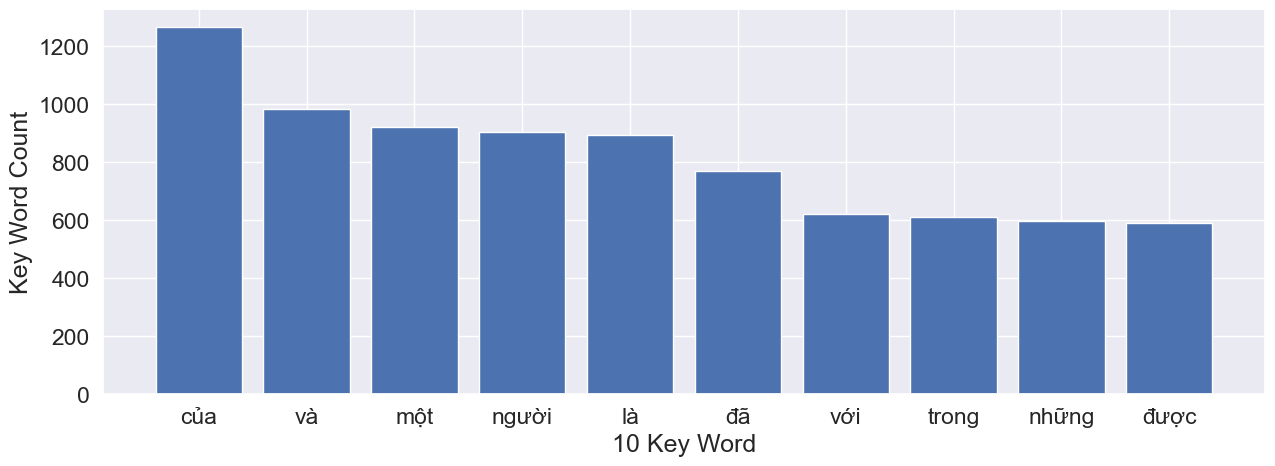

In [672]:
keys_list, values_list = zip(*top_10_elements)
plt.bar(x = keys_list, height = values_list)
plt.xlabel('10 Key Word')
plt.ylabel('Key Word Count')